# 1- Perkenalan / Introduction

```
Nama        : Rio Ardiarta Makhiyyuddin

Data        : [Data] ('credit_card_information.csv')

Objective   :  Project ini untuk melakukan Customer Segmentation dari data kartu kredit sebuah bank. Data ini merupakan data informasi penggunaan kartu kredit selama 6 bulan terakhir

```

|**Column Name**|**Description**|
|:---:|:---:|
|CUST_ID|Identification of Credit Card holder|
|BALANCE|Balance amount left in their account to make purchases|
|BALANCE_FREQUENCY|How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
|PURCHASES|Amount of purchases made from account|
|ONEOFF_PURCHASES|Maximum purchase amount done in one-go|
|INSTALLMENTS_PURCHASES|Amount of purchase done in installment|
|CASH_ADVANCE|Cash in advance given by the user|
|PURCHASES_FREQUENCY|How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)|
|ONEOFF_PURCHASES_FREQUENCY| How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)|
|PURCHASES_INSTALLMENTS_FREQUENCY|How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)|
|CASH_ADVANCE_FREQUENCY|How frequently the cash in advance being paid|
|CASH_ADVANCE_TRX|Number of Transactions made with 'Cash in Advanced'|
|PURCHASES_TRX|Number of purchase transactions made|
|CREDIT_LIMIT|Limit of Credit Card for user|
|PAYMENTS|Amount of Payment done by user|
|MINIMUM_PAYMENTS|Minimum amount of payments made by user|
|PRC_FULL_PAYMENT|Percent of full payment paid by user|
|TENURE|Tenure of credit card service for user|

# 2- Query SQL

Koneksi Google Coolab dengan BigQuery menggunakan syntax berikut

```
from google.colab import auth
from google.cloud import bigquery
import pandas as pd

auth.authenticate_user()

project_id = "plated-will-412210"


client = bigquery.Client(project=project_id)
# put your query here
query = """SELECT * 
FROM `ftds-hacktiv8-project.phase1_ftds_003_sby.credit-card-information`
where mod(cust_id,2) =1"""


# Set up the queryq
query_job = client.query(query).to_dataframe()
query_job
```

Pengambilan dataset dilakukan dengan SQL Tools

# 3- Import Libraries

In [148]:
# for basic use
import pandas as pd
import numpy as np
import json
import pickle

# for visualize
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

# for algorithms
import sklearn

# model
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score, silhouette_samples

import warnings
warnings.filterwarnings("ignore")


# 4- Data Loading

In [149]:
# Load dataset csv
df_ori = pd.read_csv ('credit_card_information.csv')

In [150]:
# Copy dataframe
df = df_ori.copy()

## 4.1- Cek Dataset

In [151]:
# Cek 10 dari atas
df.head(10)

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3091    3.833185           0.125000      45.00             45.00   
1     5069    0.000000           0.000000     176.03            176.03   
2     6075  757.964752           0.875000     157.40            157.40   
3     6291  264.566591           0.375000    1150.00           1150.00   
4     7755  440.613643           1.000000     600.00            600.00   
5     8299  611.561026           1.000000     765.00            765.00   
6     8629    0.228572           0.125000      60.00             60.00   
7     8805  105.333584           0.375000     306.00            306.00   
8        7   16.379412           0.454545     178.15              0.00   
9       91  559.151424           1.000000      94.00             94.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    0.00           0.0                0.125   
1                    0.00           0.0                0.125   
2                    0.00           0.0                0.125   
3                    0.00           0.0                0.125   
4                    0.00           0.0                0.125   
5                    0.00           0.0                0.125   
6                    0.00           0.0                0.125   
7                    0.00           0.0                0.125   
8                  178.15           0.0                0.250   
9                    0.00           0.0                0.250   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125                              0.00   
1                       0.125                              0.00   
2                       0.125                              0.00   
3                       0.125                              0.00   
4                       0.125                              0.00   
5                       0.125                              0.00   
6                       0.125                              0.00   
7                       0.125                              0.00   
8                       0.000                              0.25   
9                       0.250                              0.00   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              1         500.0   
1                     0.0                 0              1        7000.0   
2                     0.0                 0              6        1200.0   
3                     0.0                 0              1        1200.0   
4                     0.0                 0              1        1000.0   
5                     0.0                 0              1        2000.0   
6                     0.0                 0              1        1500.0   
7                     0.0                 0              2        6000.0   
8                     0.0                 0              3        5000.0   
9                     0.0                 0              3        5500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     0.000000               NaN          0.000000       8  
1     0.000000               NaN          0.000000       8  
2  1494.480376       2638.598410          0.000000       8  
3  3029.380326         85.428885          0.000000       8  
4   215.316424        137.846006          0.000000       8  
5   204.464151        146.352314          0.000000       8  
6   438.738982               NaN          0.000000       8  
7   101.986927        118.324082          0.000000       8  
8   229.376368         89.613822          0.181818      12  
9   254.733329        218.279194          0.000000      12

In [152]:
# Cek 10 dari bawah
df.tail(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4465     6809  4438.521324           1.000000     591.84            109.16   
4466     7211  1135.703750           1.000000      92.07              0.00   
4467     8295   185.984965           0.454545     482.24            392.24   
4468     8855  3531.167073           0.900000     797.50            577.83   
4469     2389  1917.895730           1.000000     285.07            285.07   
4470     2345  9629.808851           1.000000       0.00              0.00   
4471     6785  1040.030221           1.000000       0.00              0.00   
4472     7347  1322.818587           1.000000       0.00              0.00   
4473     8447  1060.391273           1.000000       0.00              0.00   
4474     1995  3447.674222           1.000000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4465                  482.68    564.365429             0.636364   
4466                   92.07     81.509491             0.272727   
4467                   90.00    903.843591             0.272727   
4468                  219.67   5273.226918             0.700000   
4469                    0.00   6084.858872             0.363636   
4470                    0.00   4372.393835             0.000000   
4471                    0.00   1390.648290             0.000000   
4472                    0.00    762.301096             0.000000   
4473                    0.00   1475.858013             0.000000   
4474                    0.00   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4465                    0.181818                          0.454545   
4466                    0.000000                          0.181818   
4467                    0.181818                          0.090909   
4468                    0.400000                          0.500000   
4469                    0.363636                          0.000000   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.000000                          0.000000   
4473                    0.000000                          0.000000   
4474                    0.090909                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4465                0.272727                 3             11       17000.0   
4466                0.272727                 3              3        1200.0   
4467                0.272727                 8              8        1200.0   
4468                0.900000                33             21        4000.0   
4469                1.090909                28              6        3000.0   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4465  5552.601399       1094.486286              0.00      11  
4466   355.798199        434.689529              0.00      11  
4467  2333.997439        160.900585              0.25      11  
4468  2979.546700       3052.080103              0.00      10  
4469  5692.682993        556.449635              0.00      11  
4470  2468.988022       2134.295731              0.00      11  
4471   290.129620        287.994171              0.00      11  
4472  1035.627320        312.835530              0.00      11  
4473   407.360560        277.084736              0.00      11  
4474   665.239171        817.844662              0.00      11

In [153]:
# Cek info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Terdapat missing value pada kolom MINIMUM_PAYMENT yang hanya berjumlah 4320 dari total keseluruhan 4475.

In [154]:
# Cek Duplikat
df.duplicated().sum()

0

In [155]:
# Cek number unique pada kolom
df.nunique()

CUST_ID                             4475
BALANCE                             4433
BALANCE_FREQUENCY                     43
PURCHASES                           3203
ONEOFF_PURCHASES                    2093
INSTALLMENTS_PURCHASES              2292
CASH_ADVANCE                        2169
PURCHASES_FREQUENCY                   46
ONEOFF_PURCHASES_FREQUENCY            45
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                51
CASH_ADVANCE_TRX                      52
PURCHASES_TRX                        150
CREDIT_LIMIT                         158
PAYMENTS                            4362
MINIMUM_PAYMENTS                    4319
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [156]:
# Cek kolom
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [157]:
# Cek jumlah data
df.shape

(4475, 18)

Terdapat 4475 baris dan 18 kolom

In [158]:
# Cek nilai nul
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [159]:
# Cek nilai mean
df.isna().mean()

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000000
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    0.034637
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

Terdapat nilai rata-rata yang tidak seimbang dengan feature lain, nunique yang cukup banyak pada feature.

In [160]:
# Cek total nilai null dari terbanyak
df.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS    155
CUST_ID               0
BALANCE               0
PRC_FULL_PAYMENT      0
PAYMENTS              0
dtype: int64

Terdapat nilai null pada feature MINIMUM_PAYMENTS dengan jumlah 155

## 4.2- Cleaning Data

In [161]:
# Cek Statistik
df.describe()

CUST_ID       BALANCE  BALANCE_FREQUENCY     PURCHASES  \
count  4475.000000   4475.000000        4475.000000   4475.000000   
mean   4475.000000   1563.205717           0.876933   1003.251343   
std    2583.931114   2072.045789           0.238222   2060.034730   
min       1.000000      0.000000           0.000000      0.000000   
25%    2238.000000    124.432849           0.888889     39.560000   
50%    4475.000000    871.355430           1.000000    360.000000   
75%    6712.000000   2047.570799           1.000000   1102.420000   
max    8949.000000  18495.558550           1.000000  41050.400000   

       ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
count       4475.000000             4475.000000   4475.000000   
mean         596.369893              407.110215    984.288554   
std         1653.425984              880.799744   2060.448056   
min            0.000000                0.000000      0.000000   
25%            0.000000                0.000000      0.000000   
50%           45.650000               88.620000      0.000000   
75%          575.220000              455.885000   1138.887754   
max        40624.060000            14686.100000  47137.211760   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count          4475.000000                 4475.000000   
mean              0.490579                    0.202301   
std               0.402907                    0.298203   
min               0.000000                    0.000000   
25%               0.083333                    0.000000   
50%               0.500000                    0.083333   
75%               0.916667                    0.250000   
max               1.000000                    1.000000   

       PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                       4475.000000             4475.000000   
mean                           0.363886                0.136132   
std                            0.397603                0.201036   
min                            0.000000                0.000000   
25%                            0.000000                0.000000   
50%                            0.166667                0.000000   
75%                            0.750000                0.250000   
max                            1.000000                1.500000   

       CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT      PAYMENTS  \
count       4475.000000    4475.000000   4475.000000   4475.000000   
mean           3.301229      14.929162   4494.878630   1740.075430   
std            7.134727      25.540814   3609.267706   2827.633858   
min            0.000000       0.000000     50.000000      0.000000   
25%            0.000000       1.000000   1600.000000    376.913051   
50%            0.000000       7.000000   3000.000000    877.494612   
75%            4.000000      17.000000   6500.000000   1911.596530   
max          123.000000     347.000000  30000.000000  50721.483360   

       MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count       4320.000000       4475.000000  4475.000000  
mean         873.976757          0.150224    11.518212  
std         2436.877272          0.289081     1.328925  
min            0.019163          0.000000     6.000000  
25%          168.590144          0.000000    12.000000  
50%          313.980229          0.000000    12.000000  
75%          819.371080          0.125000    12.000000  
max        76406.207520          1.000000    12.000000

## 4.2.1 Change Type Name

In [162]:
# Ubah string pada kolom menjadi lower
df.columns = df.columns.str.lower()

In [163]:
# Cek kolom
df.columns

Index(['cust_id', 'balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure'],
      dtype='object')

In [164]:
# Cek dataset
df

cust_id      balance  balance_frequency  purchases  oneoff_purchases  \
0        3091     3.833185              0.125      45.00             45.00   
1        5069     0.000000              0.000     176.03            176.03   
2        6075   757.964752              0.875     157.40            157.40   
3        6291   264.566591              0.375    1150.00           1150.00   
4        7755   440.613643              1.000     600.00            600.00   
...       ...          ...                ...        ...               ...   
4470     2345  9629.808851              1.000       0.00              0.00   
4471     6785  1040.030221              1.000       0.00              0.00   
4472     7347  1322.818587              1.000       0.00              0.00   
4473     8447  1060.391273              1.000       0.00              0.00   
4474     1995  3447.674222              1.000     205.00            205.00   

      installments_purchases  cash_advance  purchases_frequency  \
0                        0.0      0.000000             0.125000   
1                        0.0      0.000000             0.125000   
2                        0.0      0.000000             0.125000   
3                        0.0      0.000000             0.125000   
4                        0.0      0.000000             0.125000   
...                      ...           ...                  ...   
4470                     0.0   4372.393835             0.000000   
4471                     0.0   1390.648290             0.000000   
4472                     0.0    762.301096             0.000000   
4473                     0.0   1475.858013             0.000000   
4474                     0.0   4548.057776             0.090909   

      oneoff_purchases_frequency  purchases_installments_frequency  \
0                       0.125000                               0.0   
1                       0.125000                               0.0   
2                       0.125000                               0.0   
3                       0.125000                               0.0   
4                       0.125000                               0.0   
...                          ...                               ...   
4470                    0.000000                               0.0   
4471                    0.000000                               0.0   
4472                    0.000000                               0.0   
4473                    0.000000                               0.0   
4474                    0.090909                               0.0   

      cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                   0.000000                 0              1         500.0   
1                   0.000000                 0              1        7000.0   
2                   0.000000                 0              6        1200.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              1        1000.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         payments  minimum_payments  prc_full_payment  tenure  
0        0.000000               NaN               0.0       8  
1        0.000000               NaN               0.0       8  
2     1494.480376       2638.598410               0.0       8  
3     3029.380326         85.428885               0.0       8  
4      215.316424        137.846006               0.0       8  
...           ...               ...               ...     ...  
4470  2468.988022       21

## 4.3- Conclusion

Dari data loading dapat kita lihat, kita mendapatkan beberapa informasi bahwal terdapat mising value pada feature minimum_payment dan dilakukan pengisian nilai nan dengan rata-rata median untuk dapat mengisi nilai nan tersebut. Hal itu dapat dilakukan agar mengetahui nilai dalam clustering dengan feature lain. Dan penggantian tipe yang tadi nya Upper di ubah menjadi lower untuk mempermudah pembacaan dan menganalisa.

# 5- Exploratory Data Anlysis (EDA)

<Axes: >

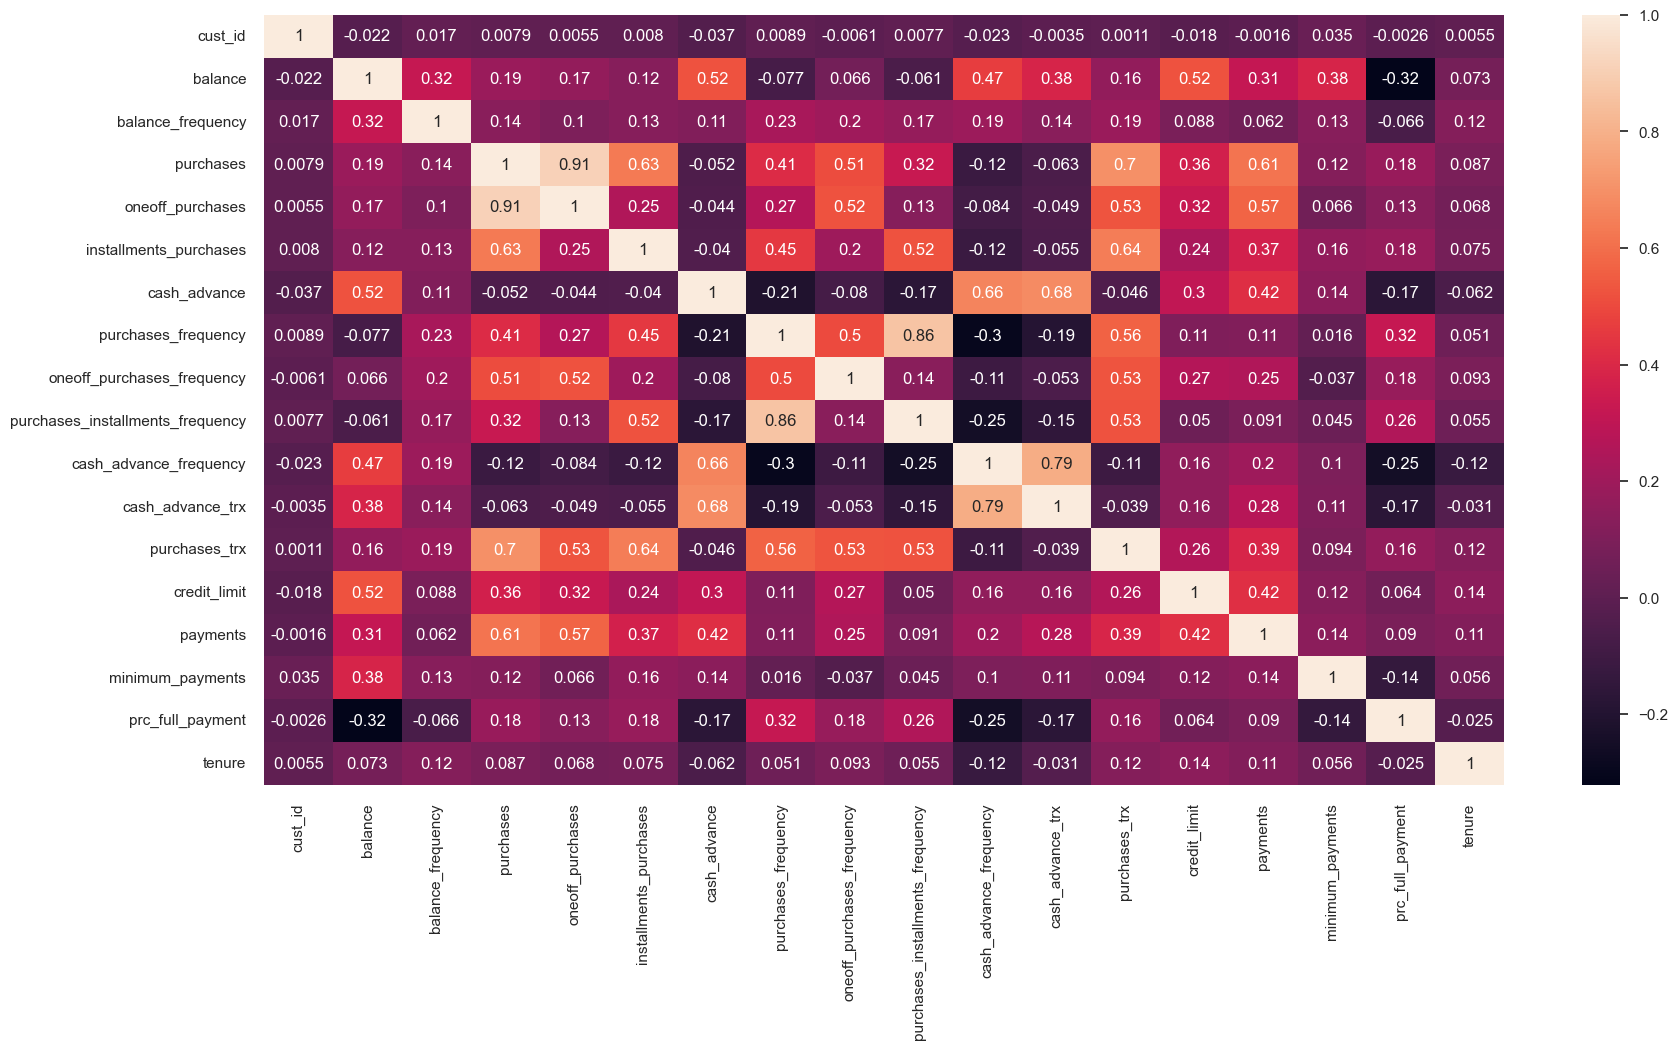

In [165]:
# Tampilkan visualisasi untuk korelasi
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(),annot=True)

Pada visualisasi heatmap diatas, diketahui bahwa korelasi antar feature pada dataset sangat rendah. Walaupun ada beberapa kolom yang memiliki korelasi yang tinggi, yaitu :

- Purchases vs Oneoff Purchases : 91%
- Purchases Installments Frequency vs Purchases Frequency : 86%
- Cash Advance TRX vs Cash Advance Frequency ; 79%
- Purchases vs Purchases TRX : 70%
- Purchase vs Payment : 61%
- Payment vs Oneoff Purchases : 57%
- Balance vs Credit Limit : 52%
- Payments vs Credit Limit : 42%

dsb.

<Axes: xlabel='tenure'>

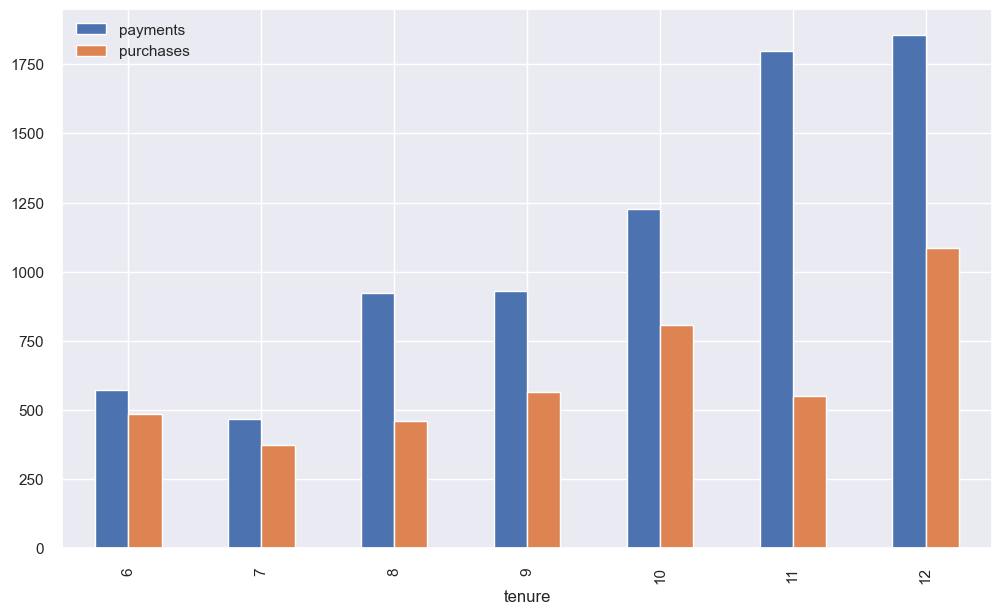

In [166]:
# Cek rata-rata pembayaran dan pembelian pada tenor
df[["payments","purchases"]].groupby(df["tenure"]).mean().plot(kind='bar')

Dapat dilihat pada visualisasi diatas, dimana rata-rata nasabah yang memiliki jatuh tempo di bulan 11 dan bulan 12 memiliki angka pembayaran yang tinggi dibandingkan dengan yang lainnya. Sedangkan nasabah yang memiliki jatuh tempo di bulan 7 memiliki pembayaran yang rendah.

## 5.1- Numerikal

### 5.1.1- Balance

In [167]:
# Mencari value count dari nilai yang paling tinggi
balance_counts = df['balance'].value_counts().sort_index().nlargest(10)

print("Count pada Index Balance:")
print(balance_counts)

Count pada Index Balance:
balance
0.000000    43
0.000199     1
0.001146     1
0.001214     1
0.001289     1
0.021102     1
0.074724     1
0.126562     1
0.144460     1
0.187069     1
Name: count, dtype: int64


In [168]:
# Mencari value count dari nilai paling rendah
bottom_balance = df['balance'].value_counts().nsmallest(5)

print("Count pada Index Balance:")
print(bottom_balance)

Count pada Index Balance:
balance
10.035492      1
2073.611538    1
1091.973832    1
1143.409012    1
2586.357487    1
Name: count, dtype: int64


Text(0, 0.5, 'Frequency')

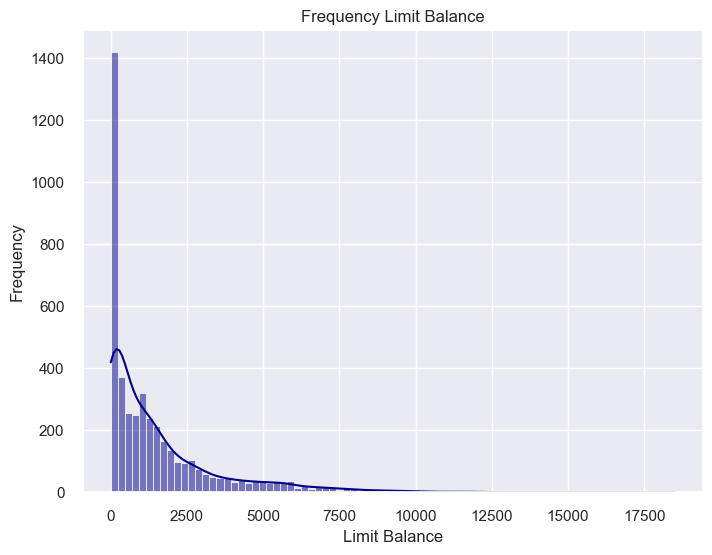

In [169]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='balance', kde=True, color='darkblue')
plt.title('Frequency Limit Balance')
plt.xlabel('Limit Balance')
plt.ylabel('Frequency')

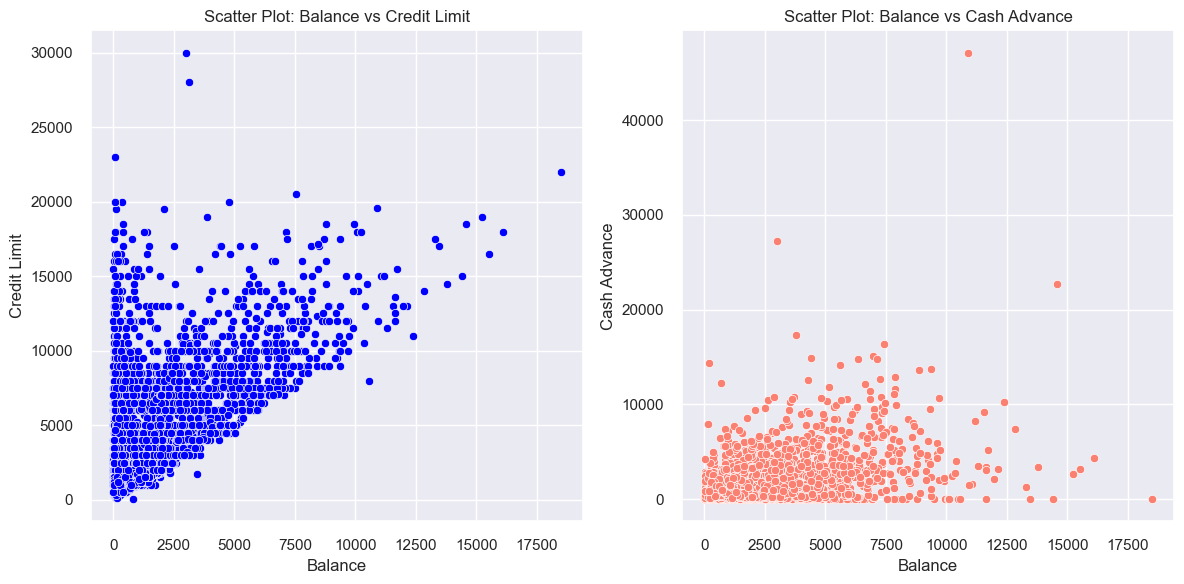

In [170]:
# Atur ukuran gambar
plt.figure(figsize=(12, 6))

# Buat scatter plot dengan dua fitur
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='balance', y='credit_limit', color='blue')
plt.title('Scatter Plot: Balance vs Credit Limit')
plt.xlabel('Balance')
plt.ylabel('Credit Limit')

# Buat scatter plot dengan dua fitur
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='balance', y='cash_advance', color='salmon')
plt.title('Scatter Plot: Balance vs Cash Advance')
plt.xlabel('Balance')
plt.ylabel('Cash Advance')

# Jarak spasi pada layout
plt.tight_layout()

# Tampilkan gambar
plt.show()

- Pada visualisasi scatter plot ini, terdapat beberapa feature `credit_limit` yang memiliki nilai korelasi sebesar 52% dan feature `cash_advance` yang memiliki nilai korelasi sebesar 52%, saat kita lihat pada visualisasi diatas bisa kita anggap sebaran datanya yang mirip dengan garis lurus dan variabel yang melaju meningkat yang berarti ini merupakan linear dan ada juga yang sebaran datanya yang berkumpul dengan aktivitas yang kurang.

- Ternyata setelah kita cek untuk jumlah pada feature `balance` memiliki nilai tertinggi pada 0 dengan nilai sebesar 43 dan untuk yang terendah keseluruhan memiliki nilai 1.

### 5.2.2- Purchases

In [171]:
# Mencari value count dari nilai yang paling tinggi
purchases_counts = df['purchases'].value_counts().sort_index().nlargest(10)

print("Count pada Index Purchases:")
print(purchases_counts)

Count pada Index Purchases:
purchases
0.00      1022
45.65       13
60.00       12
150.00      11
300.00       9
70.00        8
200.00       8
360.00       8
50.00        6
100.00       6
Name: count, dtype: int64


In [172]:
# Mencari value count dari nilai paling rendah
bottom_purchases = df['purchases'].value_counts().nsmallest(5)

print("Count pada Index Purchases:")
print(bottom_purchases)

Count pada Index Purchases:
purchases
280.24     1
1022.77    1
324.17     1
1494.50    1
81.20      1
Name: count, dtype: int64


Text(0, 0.5, 'Frequency')

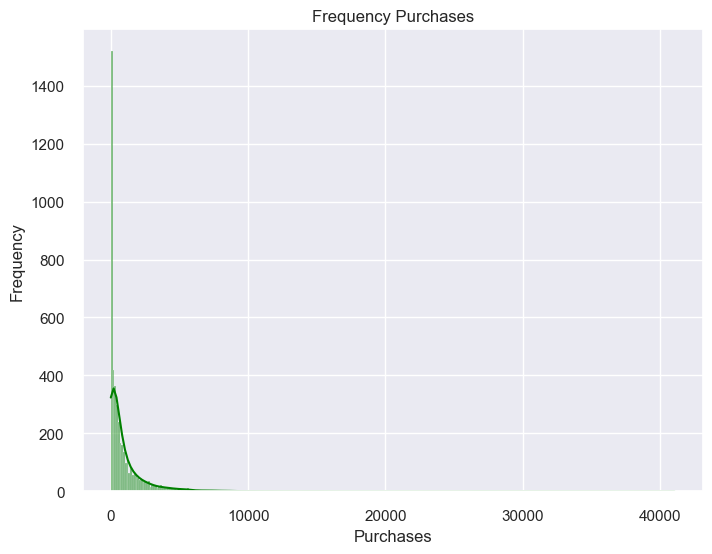

In [173]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='purchases', kde=True, color='green')
plt.title('Frequency Purchases')
plt.xlabel('Purchases')
plt.ylabel('Frequency')

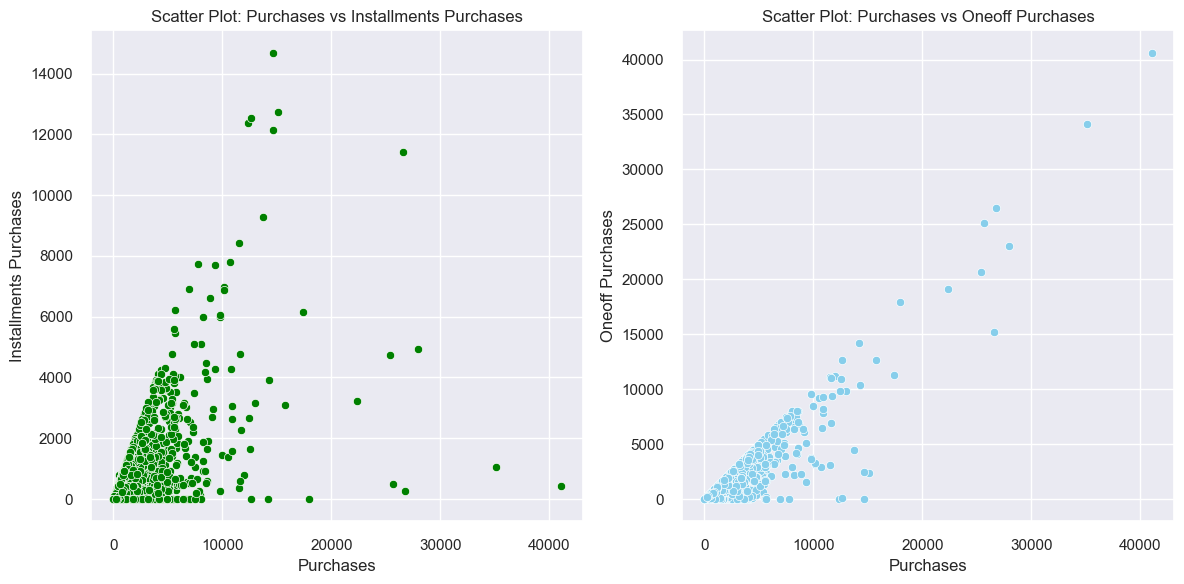

In [174]:
# Atur ukuran gambar
plt.figure(figsize=(12, 6))

# Buat scatter plot 
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='purchases', y='installments_purchases', color='green')
plt.title('Scatter Plot: Purchases vs Installments Purchases')
plt.xlabel('Purchases')
plt.ylabel('Installments Purchases')

# Buat scatter plot 
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='purchases', y='oneoff_purchases', color='skyblue')
plt.title('Scatter Plot: Purchases vs Oneoff Purchases')
plt.xlabel('Purchases')
plt.ylabel('Oneoff Purchases')

# Jarak spasi pada layout
plt.tight_layout()

# Tampilkan gambar
plt.show()

- Pada visualisasi scatter plot ini, terdapat beberapa feature `oneoff_purchases` yang memiliki nilai korelasi sebesar 91% dan feature `installments_purchases` yang memiliki nilai korelasi sebesar 63%, saat kita lihat pada visualisasi diatas bisa kita anggap sebaran datanya yang mirip dengan garis lurus dan variabel yang melaju meningkat yang berarti ini merupakan linear.

- Ternyata setelah kita cek untuk jumlah pada feature `purchases` memiliki nilai tertinggi pada 0 dengan nilai sebesar 1022 dan untuk yang terendah hampir keseluruhan memiliki nilai 1.

### 5.2.3- Credit Limit

In [175]:
# Mencari value count dengan nilai tertinggi
credit_limit_counts = df['credit_limit'].value_counts().sort_index().nlargest(15)

print("Count pada Index Credit Limit:")
print(credit_limit_counts)

Count pada Index Credit Limit:
credit_limit
3000.0    416
1500.0    355
1000.0    323
2500.0    302
1200.0    291
4000.0    253
6000.0    218
5000.0    194
2000.0    189
7500.0    151
7000.0    143
4500.0    122
6500.0    103
3500.0    102
1800.0    101
Name: count, dtype: int64


In [176]:
# Mencari value count dari nilai paling rendah
bottom_credit_limit = df['credit_limit'].value_counts().nsmallest(15)

print("Count pada Index Credit Limit:")
print(bottom_credit_limit)

Count pada Index Credit Limit:
credit_limit
19600.000000    1
10450.000000    1
8300.000000     1
50.000000       1
4450.000000     1
8954.545455     1
6200.000000     1
10400.000000    1
2850.000000     1
6727.272727     1
13600.000000    1
17150.000000    1
4950.000000     1
4050.000000     1
5400.000000     1
Name: count, dtype: int64


Text(0, 0.5, 'Frequency')

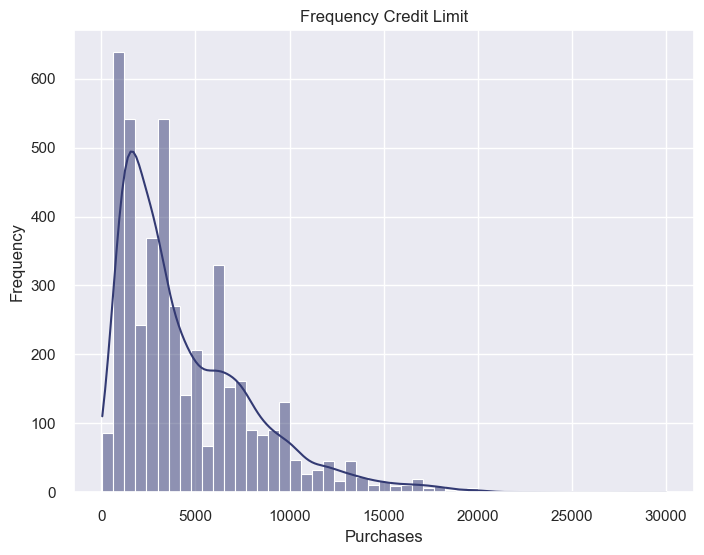

In [177]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='credit_limit', kde=True, color='#333A73')
plt.title('Frequency Credit Limit')
plt.xlabel('Purchases')
plt.ylabel('Frequency')

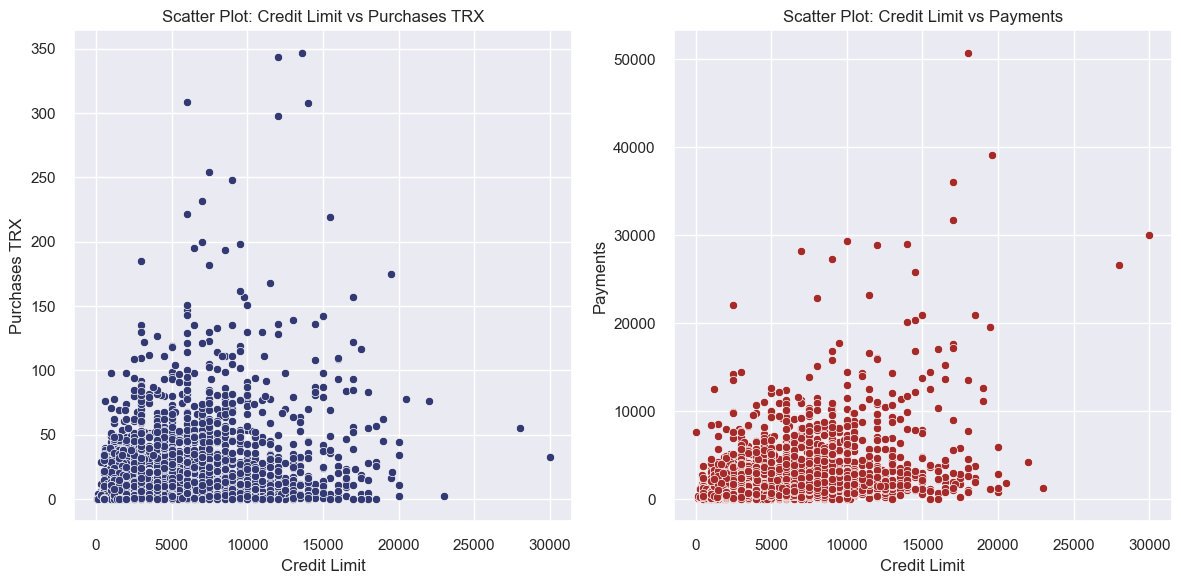

In [178]:
# Atur ukuran gambar
plt.figure(figsize=(12, 6))

# Buat scatter plot dengan dua fitur
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='credit_limit', y='purchases_trx', color='#333A73')
plt.title('Scatter Plot: Credit Limit vs Purchases TRX')
plt.xlabel('Credit Limit')
plt.ylabel('Purchases TRX')

# Buat scatter plot dengan dua fitur
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='credit_limit', y='payments', color='brown')
plt.title('Scatter Plot: Credit Limit vs Payments')
plt.xlabel('Credit Limit')
plt.ylabel('Payments')

# Jarak spasi pada layout
plt.tight_layout()

# Tampilkan gambar
plt.show()

- Dari visualisasi diatas bahwa 2 feature memiliki kemiripan pada sebaran data, dapat diartikan keduanya juga memiliki korelasi yang cukup tinggi biarpun ada beberapa sebaran data yang cukup jauh. Mungkin kita asumsikan terdapat nasabah yang memiliki `credit limit` yang tinggi untuk sekali beli saja, dan ada yang memiliki `credit limit` yang tidak tinggi tapi sering melakukan pembelian dan pembayaran secara berkala.

- Setelah kita mencari nilai value count dengan nilai tertinggi dari 10 teratas, terdapat pada 3000.0 memiliki nilai sebesar 416 dan yang kedua 355. Sedangkan untuk nilai value count dengan 15 nilai terendah memiliki nilai yang sama yaitu bernilai 1. 

### 5.2.4- Oneoff Purchases

In [179]:
# Mencari value count dari nilai yang paling tinggi
oneoff_purchases_counts = df['oneoff_purchases'].value_counts().sort_index().nlargest(10)

print("Count pada Index Oneoff Purchases:")
print(oneoff_purchases_counts)

Count pada Index Oneoff Purchases:
oneoff_purchases
0.00      2122
45.65       19
200.00      11
50.00       10
60.00        9
70.00        7
150.00       7
65.00        6
119.00       6
170.00       6
Name: count, dtype: int64


In [180]:
# Mencari value count dari nilai paling rendah
bottom_oneoff_purchases = df['oneoff_purchases'].value_counts().nsmallest(15)

print("Count pada Index Oneoff Purchases:")
print(bottom_oneoff_purchases)

Count pada Index Oneoff Purchases:
oneoff_purchases
548.89     1
81.10      1
59.40      1
61.99      1
4100.08    1
17.30      1
4072.76    1
106.01     1
193.10     1
350.57     1
2486.98    1
851.58     1
701.61     1
153.11     1
143.12     1
Name: count, dtype: int64


Text(0, 0.5, 'Frequency')

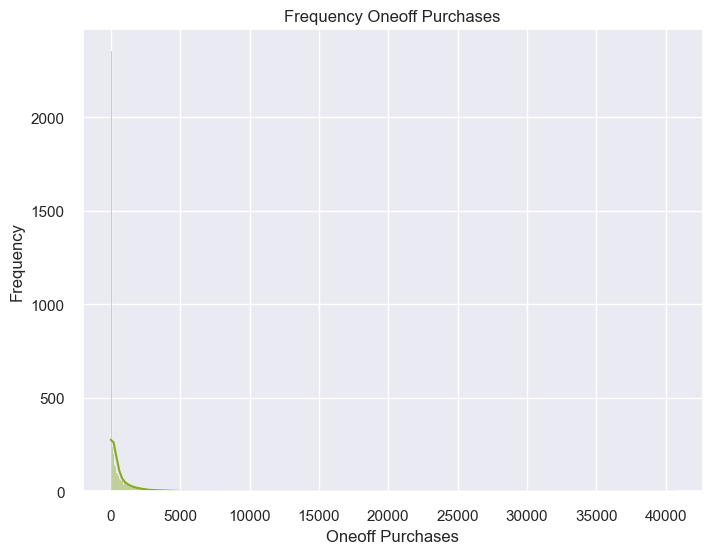

In [181]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='oneoff_purchases', kde=True, color='#87A922')
plt.title('Frequency Oneoff Purchases')
plt.xlabel('Oneoff Purchases')
plt.ylabel('Frequency')

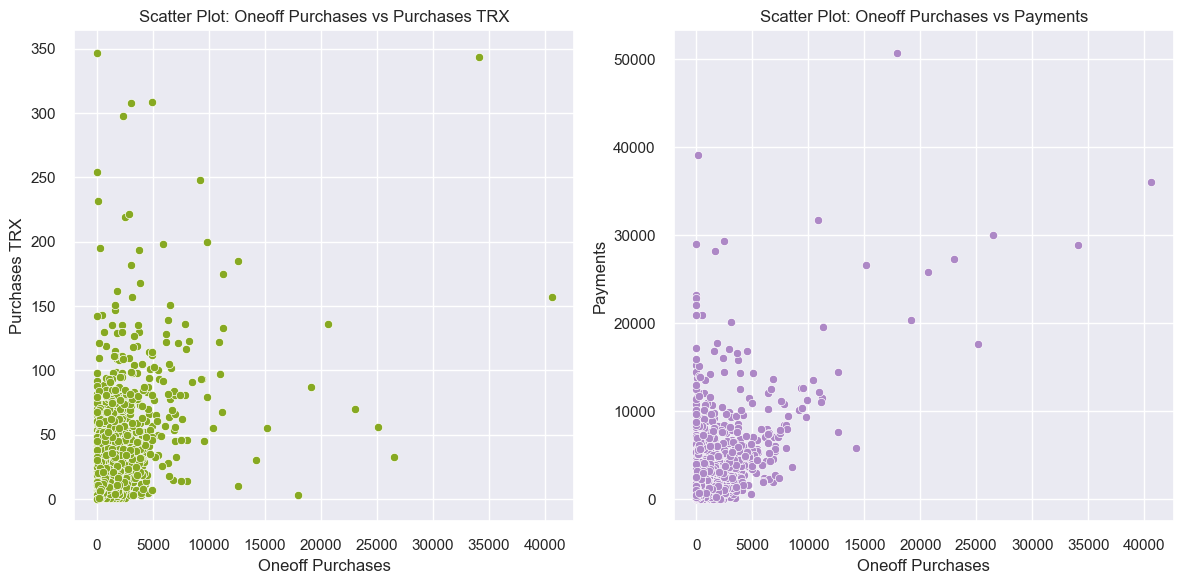

In [182]:
# Atur ukuran gambar
plt.figure(figsize=(12, 6))

# Buat scatter plot
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='oneoff_purchases', y='purchases_trx', color='#87A922')
plt.title('Scatter Plot: Oneoff Purchases vs Purchases TRX')
plt.xlabel('Oneoff Purchases')
plt.ylabel('Purchases TRX')

# Buat scatter plot
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='oneoff_purchases', y='payments', color='#AD88C6')
plt.title('Scatter Plot: Oneoff Purchases vs Payments')
plt.xlabel('Oneoff Purchases')
plt.ylabel('Payments')

# Jarak spasi pada layout
plt.tight_layout()

# Tampilkan gambar
plt.show()

- Dari 2 feature yang dipakai untuk visualisasi dikarenakan memiliki korelasi tertinggi terhadap `oneoff purchases`, dari `purchases_trx` memiliki nilai korelasi sebesar 53% dan sama halnya dengan `payments` juga memiliki nilai korelasi sebesar 57%. Dapat dilihat ada beberapa sebaran datanya yang *bivariate outlier*, dengan kita mengasumsikan terdapat nasabah yang melaukan pembelian ataupun pembayaran dengan jumlah yang begitu besar sekaligus.

- Setelah kita mencari nilai value count dengan nilai tertinggi dari 10 teratas, terdapat pada 0.0 memiliki nilai sebesar 2122 dan yang kedua 45.65 memiliki nilai sebesar 19. Sedangkan untuk nilai value count dengan 15 nilai terendah memiliki nilai yang sama yaitu bernilai 1. 

### 5.2.5- Installments Purchase    

In [183]:
# Mencari value count dari nilai yang paling tinggi
installments_purchases_counts = df['installments_purchases'].value_counts().sort_index().nlargest(10)

print("Count pada Index Installments Purchases:")
print(installments_purchases_counts)

Count pada Index Installments Purchases:
installments_purchases
0.0      1970
300.0      10
125.0       8
150.0       8
200.0       7
100.0       6
360.0       6
45.0        5
90.0        5
225.0       5
Name: count, dtype: int64


In [184]:
# Mencari value count dari nilai paling rendah
bottom_installments_purchases = df['installments_purchases'].value_counts().nsmallest(15)

print("Count pada Index Installments Purchases:")
print(bottom_installments_purchases)

Count pada Index Installments Purchases:
installments_purchases
108.20    1
427.36    1
417.00    1
139.90    1
281.97    1
96.20     1
102.75    1
456.05    1
129.24    1
327.80    1
364.19    1
913.00    1
963.61    1
78.33     1
248.76    1
Name: count, dtype: int64


Text(0, 0.5, 'Frequency')

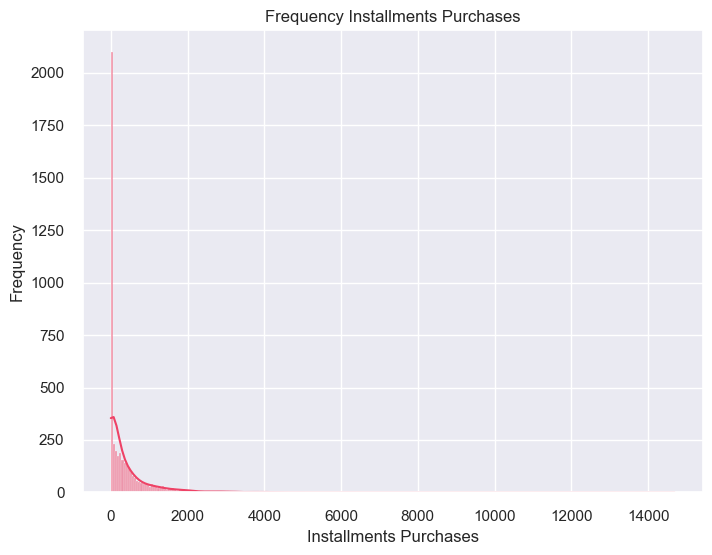

In [185]:
# Membuat histplot dengan feature x
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='installments_purchases', kde=True, color='#EE4266')
plt.title('Frequency Installments Purchases')
plt.xlabel('Installments Purchases')
plt.ylabel('Frequency')

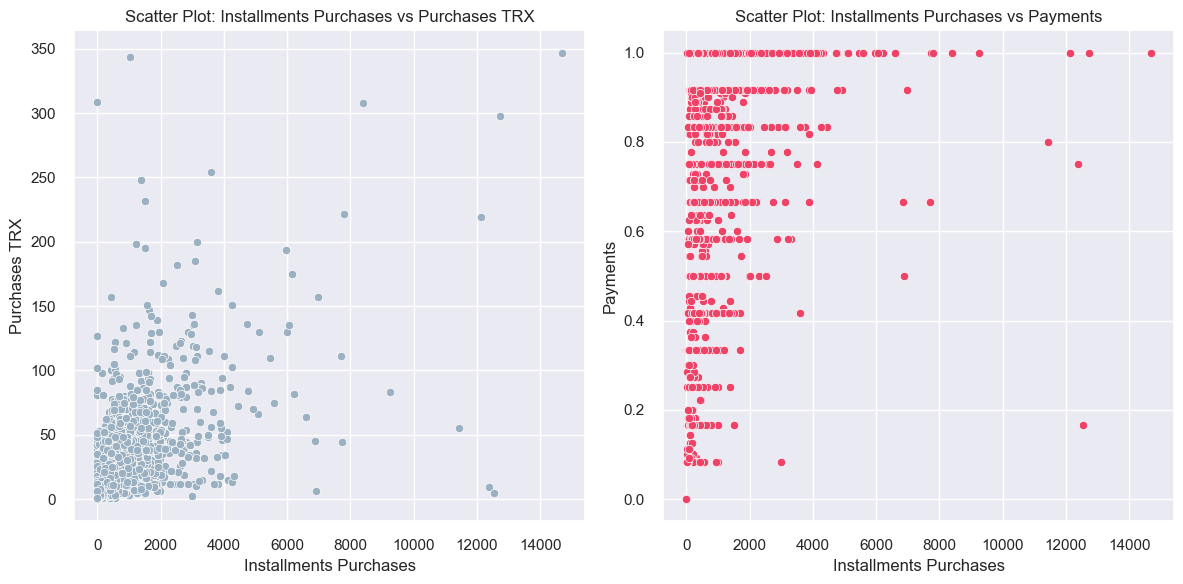

In [186]:
# Atur ukuran gambar
plt.figure(figsize=(12, 6))

# Buat scatter plot
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='installments_purchases', y='purchases_trx', color='#9BB0C1')
plt.title('Scatter Plot: Installments Purchases vs Purchases TRX')
plt.xlabel('Installments Purchases')
plt.ylabel('Purchases TRX')

# Buat scatter plot 
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='installments_purchases', y='purchases_installments_frequency', color='#EE4266')
plt.title('Scatter Plot: Installments Purchases vs Payments')
plt.xlabel('Installments Purchases')
plt.ylabel('Payments')

# Jarak spasi pada layout
plt.tight_layout()

# Tampilkan gambar
plt.show()

- Dari visualisasi diatas menggunakan scatter plot, ternyata antara `installments_purchases` dengan `payments` yang memiliki korelasi dengan nilai 63% dan antara `installments_purchases` dan `payment` memiliki korelasi dengan nilai 64%. Tapi memiliki nilai korelasi yang hampir sama, ternyata sebaran data pada scatter plot sangat berbeda jauh.

- Setelah kita mencari nilai value count dengan nilai tertinggi dari 10 teratas, terdapat pada 0.0 memiliki nilai sebesar 1970 dan yang kedua 300.0 memiliki nilai sebesar 10. Sedangkan untuk nilai value count dengan 15 nilai terendah memiliki nilai yang sama yaitu bernilai 1. 

### 5.2.6- Cash Advance

In [187]:
# Mencari value count dari nilai yang paling tinggi
cash_advance_counts = df['cash_advance'].value_counts().sort_index().nlargest(10)

print("Count pada Index Cash Advance:")
print(cash_advance_counts)

Count pada Index Cash Advance:
cash_advance
0.000000     2307
18.149946       1
18.240626       1
18.280043       1
18.510103       1
18.531069       1
18.561424       1
18.573429       1
18.616675       1
18.766426       1
Name: count, dtype: int64


In [188]:
# Mencari value count dari nilai paling rendah
bottom_cash_advance = df['cash_advance'].value_counts().nsmallest(15)

print("Count pada Index Cash Advance:")
print(bottom_cash_advance)

Count pada Index Cash Advance:
cash_advance
131.233151      1
1379.587830     1
323.218285      1
317.505521      1
3776.644822     1
2071.167874     1
1113.186078     1
1435.307385     1
1158.897578     1
10590.411130    1
550.830512      1
1087.144848     1
614.430788      1
254.011804      1
1930.273374     1
Name: count, dtype: int64


Text(0, 0.5, 'Frequency')

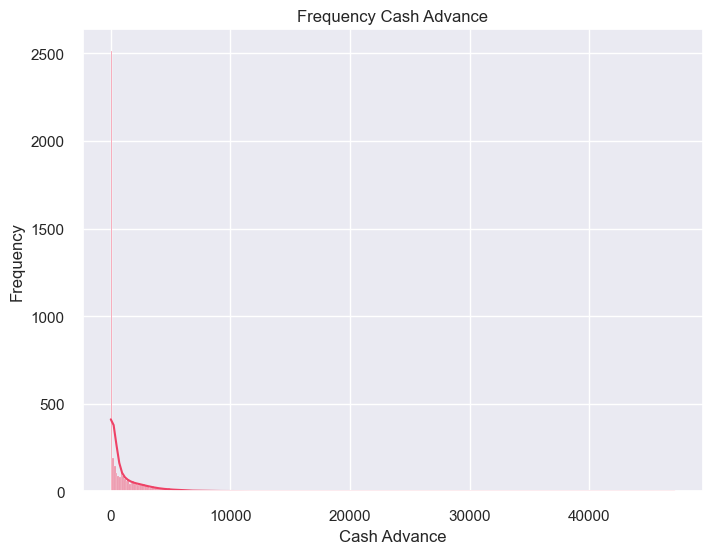

In [189]:
# Membuat histplot dengan feature x
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='cash_advance', kde=True, color='#EE4266')
plt.title('Frequency Cash Advance')
plt.xlabel('Cash Advance')
plt.ylabel('Frequency')

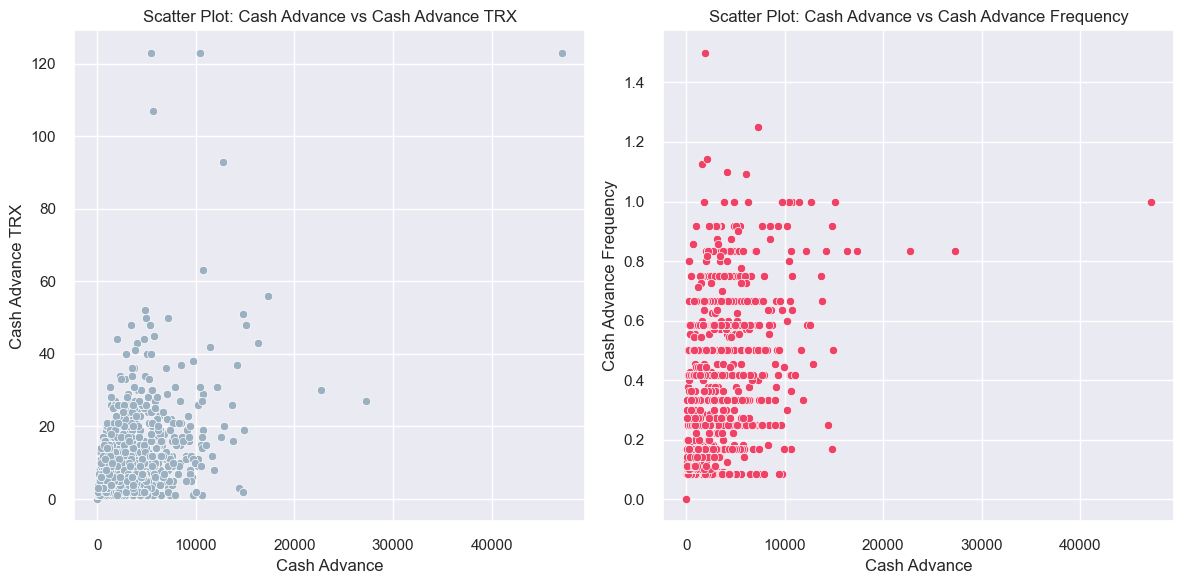

In [190]:
# Atur ukuran gambar
plt.figure(figsize=(12, 6))

# Buat scatter plot
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='cash_advance', y='cash_advance_trx', color='#9BB0C1')
plt.title('Scatter Plot: Cash Advance vs Cash Advance TRX')
plt.xlabel('Cash Advance')
plt.ylabel('Cash Advance TRX')

# Buat scatter plot 
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='cash_advance', y='cash_advance_frequency', color='#EE4266')
plt.title('Scatter Plot: Cash Advance vs Cash Advance Frequency')
plt.xlabel('Cash Advance')
plt.ylabel('Cash Advance Frequency')

# Jarak spasi pada layout
plt.tight_layout()

# Tampilkan gambar
plt.show()

- Dari visualisasi diatas menggunakan scatter plot, ternyata antara `cash_advance` dengan `cash_advance_trx` yang memiliki korelasi dengan nilai 68% dan antara `cash_advance` dan `cash_advance_frequency` memiliki korelasi dengan nilai 66%. Tapi memiliki nilai korelasi yang hampir sama, ternyata sebaran data pada scatter plot sangat berbeda jauh. Dan terdapat data yang cukup jauh data yang lainnya.

- Setelah kita mencari nilai value count dengan nilai tertinggi dari 10 teratas, terdapat pada 0.0 memiliki nilai sebesar 2307 dan yang kedua 18.15 memiliki nilai sebesar 1. Sedangkan untuk nilai value count dengan 15 nilai terendah memiliki nilai yang sama yaitu bernilai 1. 

## 5.2- Insight EDA

**Insight:**

- Terdapat beberapa feature yang perseberan datanya memiliki sifat cenderung linear, misalnya antara feature oneoff_purcahses dengan feature purchases, feature installment_purchases dengaan feature purchases. Namun banyak juga feature yang persebaran datanya tidak linear. Karena hanya beberapa saja dari feature yang memiliki kemiripan dengan garis lurus.

- Terdapat beberapa data yang sifatnya *bivariate outlier*, misalnya antara feature purchases dengan feature balance. Dapat kita asumsikan terdapat nasabah yang melakukan pembelian besar, tapi masih memiliki limit credit card yang masih besar juga. Hal ini dapa terjadi karena biasa melakukan pelunasan langsung saat ada tagihannya.

# 6- Feature Engineering

## 6.1- Handling Data

In [191]:
# melihat distribusi data setiap kolom numerik
listSkew = []
for col in df:
  listSkew.append([col, df[col].mean(), df[col].median(), 
                   df[col].mode()[0], df[col].skew(),df[col].kurtosis()])

pd.DataFrame(columns=['column name', 'mean', 'median','mode','skew', 'kurtosis'], data=listSkew)

column name         mean       median         mode  \
0                            cust_id  4475.000000  4475.000000     1.000000   
1                            balance  1563.205717   871.355430     0.000000   
2                  balance_frequency     0.876933     1.000000     1.000000   
3                          purchases  1003.251343   360.000000     0.000000   
4                   oneoff_purchases   596.369893    45.650000     0.000000   
5             installments_purchases   407.110215    88.620000     0.000000   
6                       cash_advance   984.288554     0.000000     0.000000   
7                purchases_frequency     0.490579     0.500000     1.000000   
8         oneoff_purchases_frequency     0.202301     0.083333     0.000000   
9   purchases_installments_frequency     0.363886     0.166667     0.000000   
10            cash_advance_frequency     0.136132     0.000000     0.000000   
11                  cash_advance_trx     3.301229     0.000000     0.000000   
12                     purchases_trx    14.929162     7.000000     0.000000   
13                      credit_limit  4494.878630  3000.000000  3000.000000   
14                          payments  1740.075430   877.494612     0.000000   
15                  minimum_payments   873.976757   313.980229   299.351881   
16                  prc_full_payment     0.150224     0.000000     0.000000   
17                            tenure    11.518212    12.000000    12.000000   

         skew    kurtosis  
0    0.000000   -1.200000  
1    2.329009    7.181574  
2   -2.026530    3.099104  
3    7.071706   85.129517  
4    9.951057  164.111661  
5    6.330630   65.335628  
6    5.638109   73.399145  
7    0.058755   -1.649169  
8    1.548319    1.198458  
9    0.508296   -1.403919  
10   1.834211    3.471840  
11   6.420104   76.017405  
12   4.747507   36.712384  
13   1.498948    2.778728  
14   5.747503   54.764201  
15  14.669771  331.636648  
16   1.975238    2.577571  
17  -2.954159    7.811616

**Kesimpulan :**

- Dapat dilihat dari data diatas, bawah rata-rata tertinggi adalah `credit limit` dengan nilai sebesar 4495, sedangkan rata-rata terendah adalah `cash advance frequency` dengan nilai sebesar 0.136.
- Untuk median dengan nilai tertinggi adalah `credit limit` sebesar 3000 dan untuk median dengan nilai terendah terdapat 4 fitur yaitu `cas_advance`, `cash_advance_frequency`, `cash_advance_trx`, dan `prc_full_payment` dengan nilai sebesar 0.
- Dari nilai skew yang dilampirkan diatas, terdapat 2 kolom yang memiliki kemiringan ke kiri yaitu `tenure` dan `balance_frequency`.
- Dan dari data itu juga terdapat 2 kolom yang memiliki nilai yang simetris dengan nilai 0, yaitu `purchases_frequency` dan `purcahses_installments_frequency`.
- Untuk sisanya karena nilai skew yang positif, yang menunjukan  bahwa distribusinya condong ke kanan.

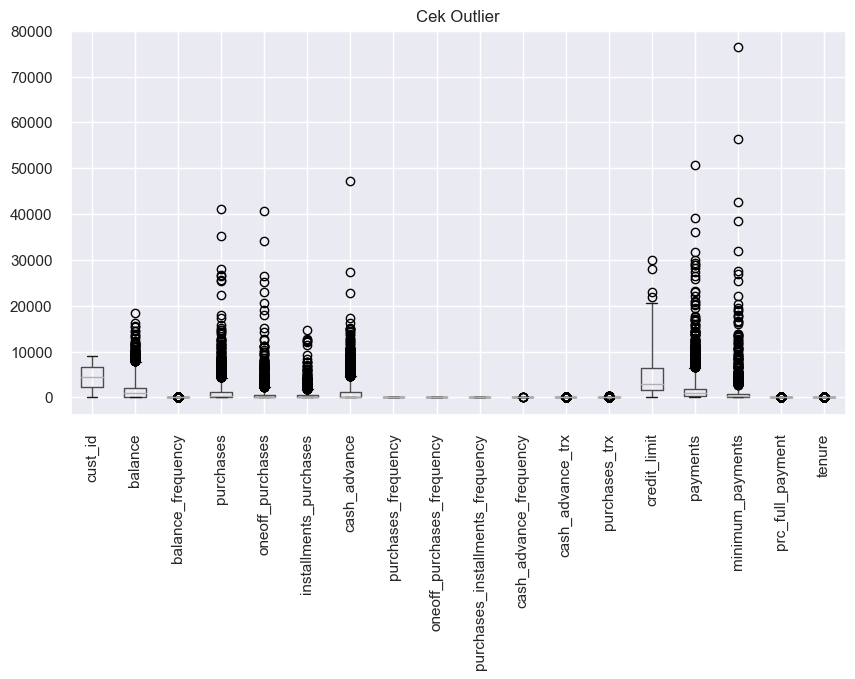

In [192]:
# boxplot untuk melihat outlier
plt.figure(figsize=(10,5))
df.boxplot(rot=90, whis=3)
plt.title('Cek Outlier')
plt.show()

Pada visualisasi diatas hanya terdapat beberapa feature saja yang tidak memiliki outlier dan terdapat juga feature yang memiliki outlier yang banyak dan paling tinggi daripada yang lainnya.

## 6.2- Handling Missing Value

In [193]:
# Cek jumlah nilai null pada dataframe
df.isnull().sum()

cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          0
payments                              0
minimum_payments                    155
prc_full_payment                      0
tenure                                0
dtype: int64

Dapat dilihat bahwa feature minimum_payments memiliki cukup banyak nilai null. Maka akan kita drop karena setelah dicek pada explorasi data diatas, feature minimum memiliki korelasi paling rendah daripada feature lain.

In [194]:
# Cek feature minimum_payments untuk nilai null
df[df["minimum_payments"].isnull()].T

0         1            6     \
cust_id                           3091.000000  5069.000  8629.000000   
balance                              3.833185     0.000     0.228572   
balance_frequency                    0.125000     0.000     0.125000   
purchases                           45.000000   176.030    60.000000   
oneoff_purchases                    45.000000   176.030    60.000000   
installments_purchases               0.000000     0.000     0.000000   
cash_advance                         0.000000     0.000     0.000000   
purchases_frequency                  0.125000     0.125     0.125000   
oneoff_purchases_frequency           0.125000     0.125     0.125000   
purchases_installments_frequency     0.000000     0.000     0.000000   
cash_advance_frequency               0.000000     0.000     0.000000   
cash_advance_trx                     0.000000     0.000     0.000000   
purchases_trx                        1.000000     1.000     1.000000   
credit_limit                       500.000000  7000.000  1500.000000   
payments                             0.000000     0.000   438.738982   
minimum_payments                          NaN       NaN          NaN   
prc_full_payment                     0.000000     0.000     0.000000   
tenure                               8.000000     8.000     8.000000   

                                         21           25       31       79    \
cust_id                            883.000000  1173.000000  1711.00  6573.00   
balance                           1464.324632    16.887571     0.00     0.00   
balance_frequency                    1.000000     0.363636     0.00     0.00   
purchases                         1174.390000  1083.000000     9.28    63.30   
oneoff_purchases                  1174.390000  1083.000000     0.00     0.00   
installments_purchases               0.000000     0.000000     9.28    63.30   
cash_advance                         0.000000     0.000000     0.00     0.00   
purchases_frequency                  0.250000     0.250000     0.25     0.25   
oneoff_purchases_frequency           0.250000     0.250000     0.00     0.00   
purchases_installments_frequency     0.000000     0.000000     0.25     0.25   
cash_advance_frequency               0.000000     0.000000     0.00     0.00   
cash_advance_trx                     0.000000     0.000000     0.00     0.00   
purchases_trx                        8.000000     3.000000     3.00     3.00   
credit_limit                      9000.000000  1200.000000  5000.00  2700.00   
payments                             0.000000  3905.430817     0.00     0.00   
minimum_payments                          NaN          NaN      NaN      NaN   
prc_full_payment                     0.000000     0.000000     0.00     0.00   
tenure                              12.000000    12.000000    12.00    12.00   

                                         83       100          156   ...  \
cust_id                           6863.000000  8211.00  3115.000000  ...   
balance                             10.684577     0.00    24.297113  ...   
balance_frequency                    0.181818     0.00     0.636364  ...   
purchases                          300.000000    37.65   230.470000  ...   
oneoff_purchases                     0.000000     0.00     0.000000  ...   
installments_purchases             300.000000    37.65   230.470000  ...   
cash_advance                         0.000000     0.00     0.000000  ...   
purchases_frequency                  0.250000     0.25     0.500000  ...   
oneoff_purchases_frequency           0.000000     0.00     0.000000  ...   
purchases_installments_frequency     0.250000     0.25     0.500000  ...   
cash_advance_frequency               0.000000     0.00     0.000000  ...   
cash_advance_trx                     0.000000     0.00     0.000000  ...   
purchases_trx                        3.000000     3.00     7.000000  ...   
credit_limit                      4000.000000  1500.00  4000.000000  ...   
payments   

Pada feature `minimum_payments` memiliki nilai null cukup banyak, karena saat dilihat pada visualisasi heatmap feature minimum_payments hanya memiliki korelasi tertinggi dengan feature balance dengan nilai sebesar 38% dan untuk korelasi dengan feature lain sangat rendah nilainya, oleh maka dari itu menurut asumsi saya akan dilakukan drop terhadap data yang memiliki nilai null.

In [195]:
# Cek data duplikat
df.duplicated().sum()

0

In [196]:
# Cek kolom
list(df.columns)

['cust_id',
 'balance',
 'balance_frequency',
 'purchases',
 'oneoff_purchases',
 'installments_purchases',
 'cash_advance',
 'purchases_frequency',
 'oneoff_purchases_frequency',
 'purchases_installments_frequency',
 'cash_advance_frequency',
 'cash_advance_trx',
 'purchases_trx',
 'credit_limit',
 'payments',
 'minimum_payments',
 'prc_full_payment',
 'tenure']

In [197]:
# Hapus missing value pada kolom minimum_payments
df.dropna(inplace=True)

In [198]:
# Cek missing value pada kolom minimum_payments 

df['minimum_payments'].isnull().sum()

0

In [199]:
# Cek pembagian distribusi skew dan normal

dist_cek = df.skew(numeric_only=True)

normal = []
skew = []

for i in range(len(dist_cek)):
    if dist_cek.values[i] < -0.5:
        skew.append(dist_cek.index[i])
    elif dist_cek.values[i] > 0.5:
        skew.append(dist_cek.index[i])
    else:
        normal.append(dist_cek.index[i])

print('Kolom Skew Distribution:', skew)
print('Kolom Normal Distribusi', normal)

Kolom Skew Distribution: ['balance', 'balance_frequency', 'purchases', 'oneoff_purchases', 'installments_purchases', 'cash_advance', 'oneoff_purchases_frequency', 'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment', 'tenure']
Kolom Normal Distribusi ['cust_id', 'purchases_frequency', 'purchases_installments_frequency']


In [200]:
df.skew()

cust_id                             -0.000910
balance                              2.306056
balance_frequency                   -2.085656
purchases                            6.982698
oneoff_purchases                     9.827307
installments_purchases               6.252820
cash_advance                         5.611537
purchases_frequency                  0.030477
oneoff_purchases_frequency           1.514243
purchases_installments_frequency     0.489101
cash_advance_frequency               1.802858
cash_advance_trx                     6.352409
purchases_trx                        4.694067
credit_limit                         1.487941
payments                             5.720099
minimum_payments                    14.669771
prc_full_payment                     1.918902
tenure                              -3.026040
dtype: float64

In [201]:
num_col_s = df[['balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
             'installments_purchases', 'cash_advance', 'oneoff_purchases_frequency',
             'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
             'credit_limit', 'payments', 'prc_full_payment', 'tenure']]
num_col_n = df[['purchases_frequency', 'purchases_installments_frequency']]

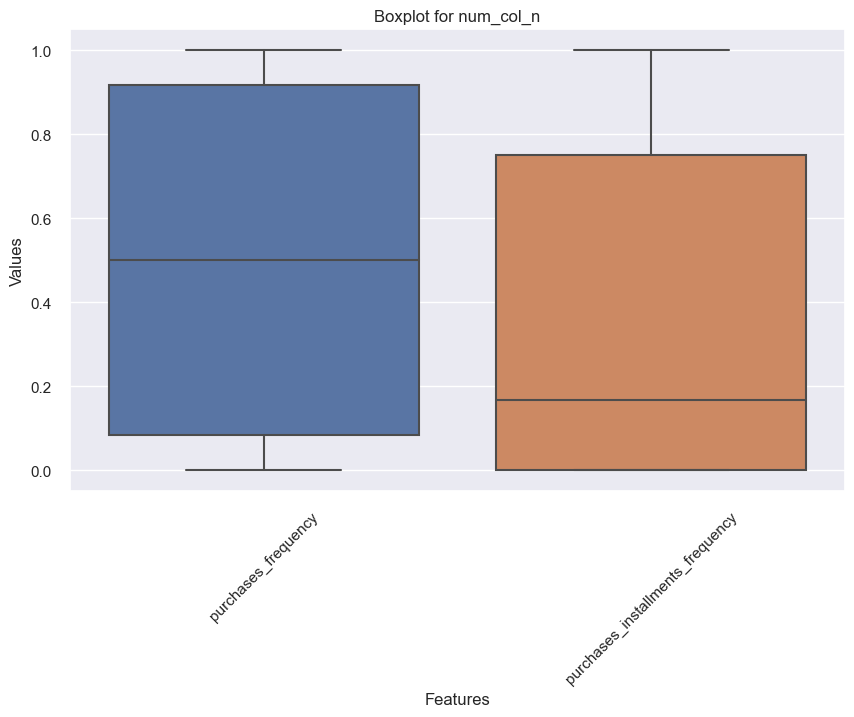

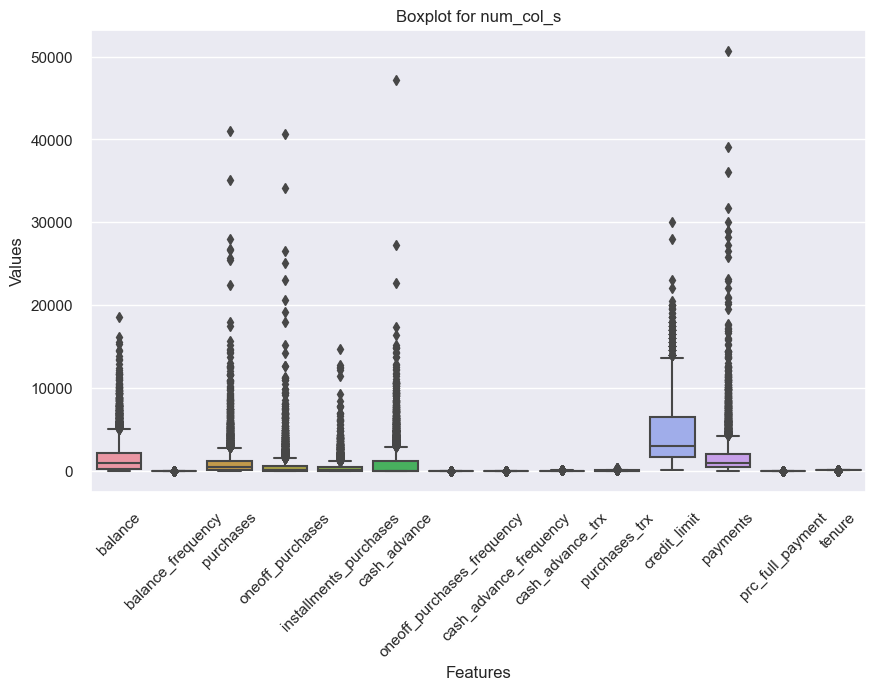

In [202]:
# Membuat boxplot untuk num_col_n
plt.figure(figsize=(10, 6))
sns.boxplot(data=num_col_n)
plt.title('Boxplot for num_col_n')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Mengatur rotasi label sumbu x
plt.show()

# Membuat boxplot untuk num_col_s
plt.figure(figsize=(10, 6))
sns.boxplot(data=num_col_s)
plt.title('Boxplot for num_col_s')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Mengatur rotasi label sumbu x
plt.show()


Visualisasi di atas merupakan distribusi normal yang belum di lakukan capping.

In [203]:
# Capping outlier
windsoriser_n = Winsorizer(capping_method='gaussian',
                          tail='both', 
                          fold=3,
                          variables=['purchases_frequency', 'purchases_installments_frequency'],
                          missing_values='ignore')

df_cap_n = windsoriser_n.fit_transform(num_col_n)

In [204]:
# Capping outlier
windsoriser_s = Winsorizer(capping_method='gaussian',
                          tail='both', 
                          fold=3,
                          variables=['balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
                                     'installments_purchases', 'cash_advance', 'oneoff_purchases_frequency',
                                     'cash_advance_frequency', 'cash_advance_trx',
                                     'purchases_trx', 'credit_limit', 'payments',
                                     'prc_full_payment', 'tenure'],
                          missing_values='ignore')

df_cap_s = windsoriser_s.fit_transform(num_col_s)

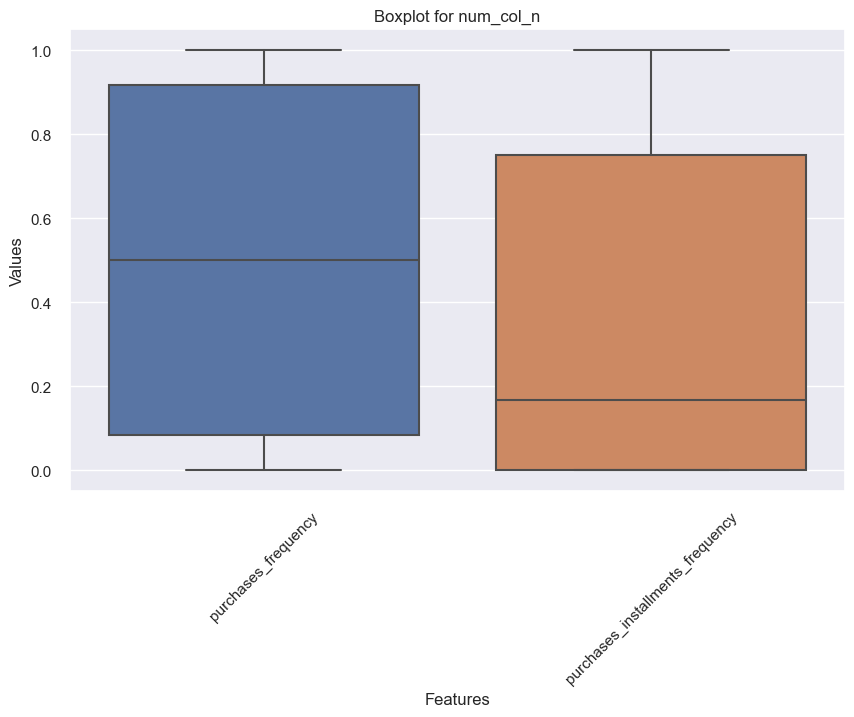

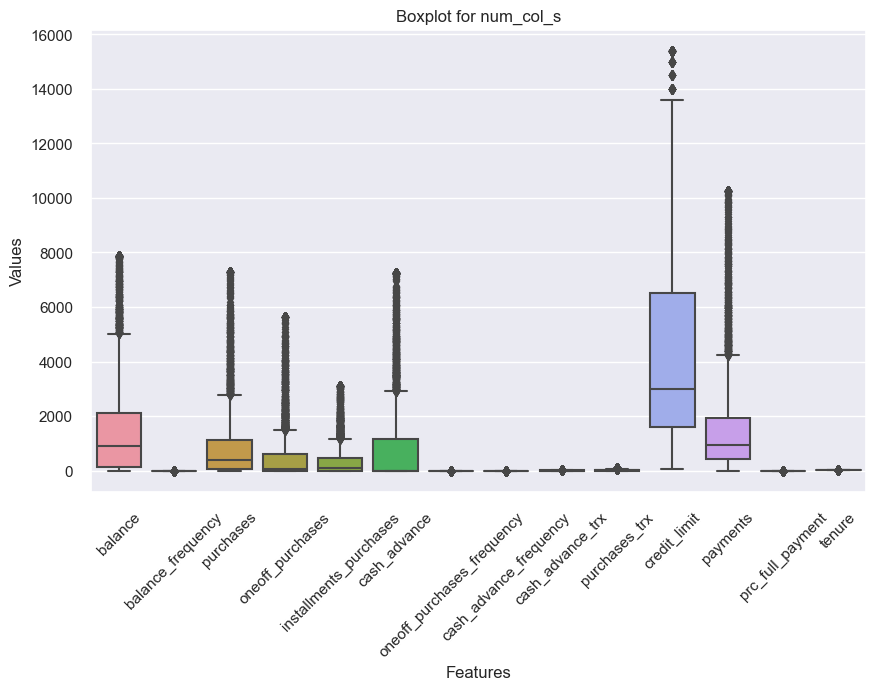

In [205]:
# Membuat boxplot untuk num_col_n
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cap_n)
plt.title('Boxplot for num_col_n')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Mengatur rotasi label sumbu x
plt.show()

# Membuat boxplot untuk num_col_s
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cap_s)
plt.title('Boxplot for num_col_s')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Mengatur rotasi label sumbu x
plt.show()


Dapa dilihat dari visualisasi diatas merupakan kondisi yang sudah dilakukan capping, dari perbedaan diatas adalah outlier yang ekstrem terdapat pada distribusi skew. Dan setelah dilakukan capping handling outlier yang ekstrem bisa dikurangi.

## 6.3- Feature Scaling

### 6.3.1- MinMaxScaler

In [206]:
scaler_skew = MinMaxScaler()
scaler_skew.fit(df_cap_s)

MinMaxScaler()

In [207]:
df_scaler_skew = scaler_skew.transform(df_cap_s)
df_scaler_skew

array([[0.09651228, 0.82903428, 0.02157542, ..., 0.14589917, 0.        ,
        0.08140924],
       [0.03368748, 0.14517141, 0.1576349 , ..., 0.29574928, 0.        ,
        0.08140924],
       [0.0561037 , 1.        , 0.08224429, ..., 0.0210162 , 0.        ,
        0.08140924],
       ...,
       [0.16843558, 1.        , 0.        , ..., 0.101102  , 0.        ,
        0.77035231],
       [0.13502049, 1.        , 0.        , ..., 0.0397652 , 0.        ,
        0.77035231],
       [0.43899519, 1.        , 0.02810013, ..., 0.06494152, 0.        ,
        0.77035231]])

### 6.3.2- Standar Scaler

In [208]:
scaler_nor = StandardScaler()
scaler_nor.fit(df_cap_n)

StandardScaler()

In [209]:
df_scaler_nor = scaler_nor.transform(df_cap_n)
df_scaler_nor

array([[-0.92146472, -0.92428962],
       [-0.92146472, -0.92428962],
       [-0.92146472, -0.92428962],
       ...,
       [-1.23166   , -0.92428962],
       [-1.23166   , -0.92428962],
       [-1.00606366, -0.92428962]])

### 6.3.3- Merge (concat) Data

In [210]:
df_final = np.concatenate([df_scaler_skew,df_scaler_nor],axis=1)
df_final[0]

array([ 0.09651228,  0.82903428,  0.02157542,  0.02788561,  0.        ,
        0.        ,  0.125     ,  0.        ,  0.        ,  0.06461265,
        0.07487953,  0.14589917,  0.        ,  0.08140924, -0.92146472,
       -0.92428962])

### 6.3.4- PCA

In [211]:
# Train with PCA

pca = PCA()
pca.fit(df_final)

PCA()

Sebelum mengetahui berapa jumlah kolom terbaik setelah direduksi makan dilakukan inisiasi awal pada metode PCA dengan jumlah komponen berjumlah 10.

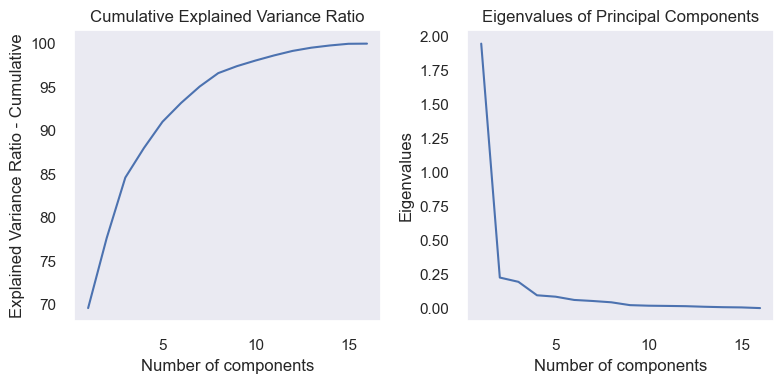

In [214]:
# Membuat visualisasi pada PCA
plt.figure(figsize=[8,4])

# Plot the Eigenvalues
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cumulative')
plt.title('Cumulative Explained Variance Ratio')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalues of Principal Components')

# Jarak spasi pada layout
plt.tight_layout()

plt.show()

Visualisasi mengenai metode PCA yang telah dilakukan, dimana dapat dilihat pada diagram sebelah kanan terdapat patahan pada komponen 6 memiliki ratio sekitar 0.95. Sehingga dari total 17 kolom yang dimiliki oleh dataset, maka akan direduksi menjadi 5 kolom saja

In [215]:
# Model PCA mengunakan component 95%
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

7

Hasil dari reduksi dimensi yang telah dilakukan, dimana telah ditentukan bahwa jumlah component yang akan diambil adalah berjumlah 0.95 yang artinya jumlah komponen yang akan di pakai adalah 7.

In [216]:
pca = PCA(n_components=0.95)
pca.fit(df_final)

df_final_pca = pca.transform(df_final)

PCA n_component = 0.95 agar bisa mengurangi fitur dan mempertahankan data 95%

#### 6.3.4.1- Elbow Method

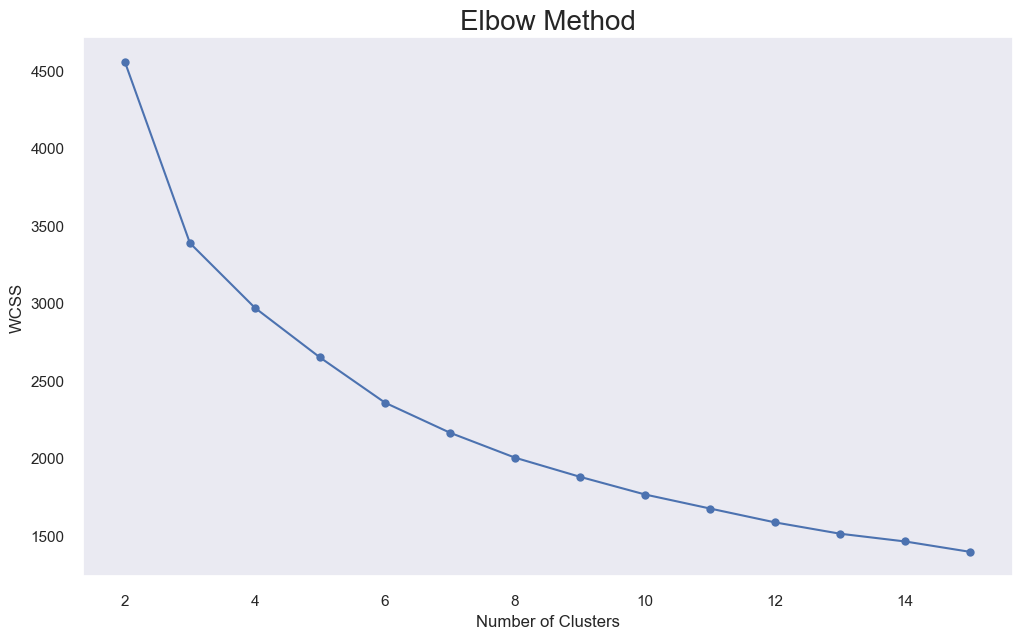

In [217]:
# Find the optimal number of clusters using Elbow Method

wcss = []
random_state = 10
max_cluster = 15
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(df_final_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Berdasarkan visualisasi diatas, titik sikunya pada number of cluster 3, artinya dari Elbow Method menunjukan cluster yang paling bagus adalah 3.

#### 6.3.4.2- Silhouette Method

In [218]:
# Function to create Silhouette Plot

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.5107509330436134
For n_clusters = 3 The average silhouette_score is : 0.4044185795395038
For n_clusters = 4 The average silhouette_score is : 0.3982156028068546
For n_clusters = 5 The average silhouette_score is : 0.36415899339982544
For n_clusters = 6 The average silhouette_score is : 0.28223721141514657
For n_clusters = 7 The average silhouette_score is : 0.2970677567587342
For n_clusters = 8 The average silhouette_score is : 0.2943527498662008
For n_clusters = 9 The average silhouette_score is : 0.29302749255175325
For n_clusters = 10 The average silhouette_score is : 0.2891750799250959
For n_clusters = 11 The average silhouette_score is : 0.3042239621068397
For n_clusters = 12 The average silhouette_score is : 0.29520111703539936
For n_clusters = 13 The average silhouette_score is : 0.2947878341417536
For n_clusters = 14 The average silhouette_score is : 0.2888024870267083


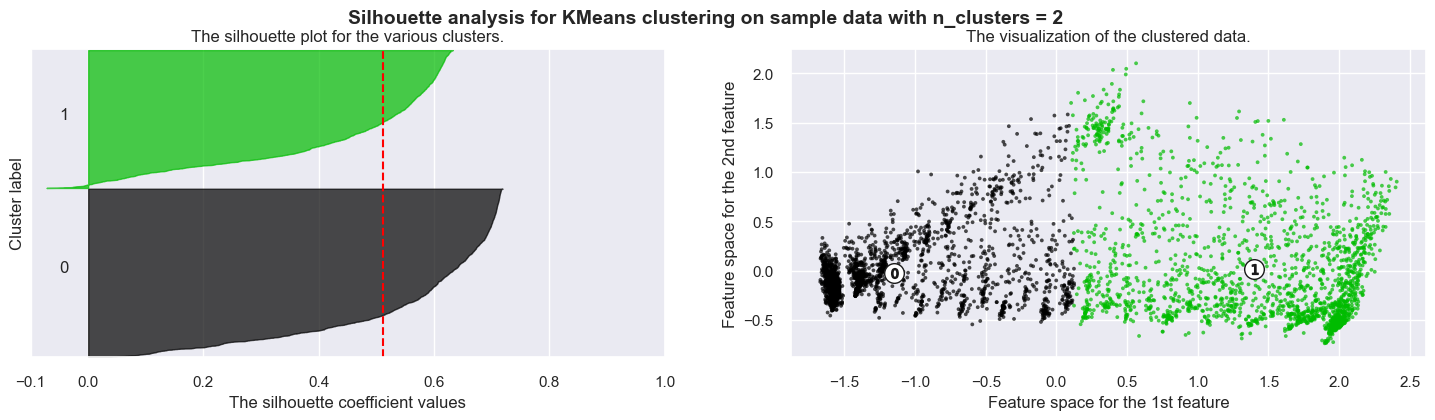

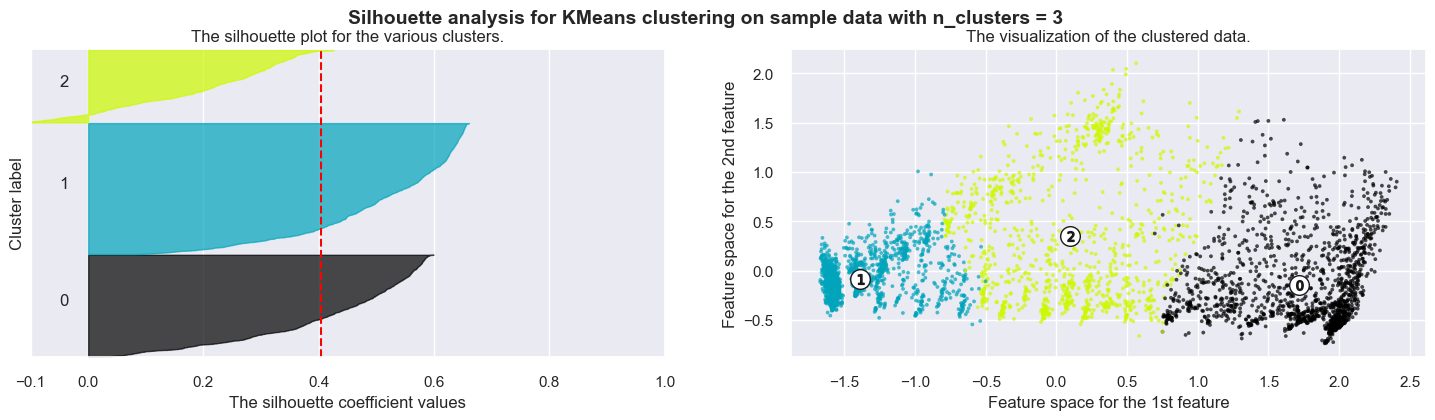

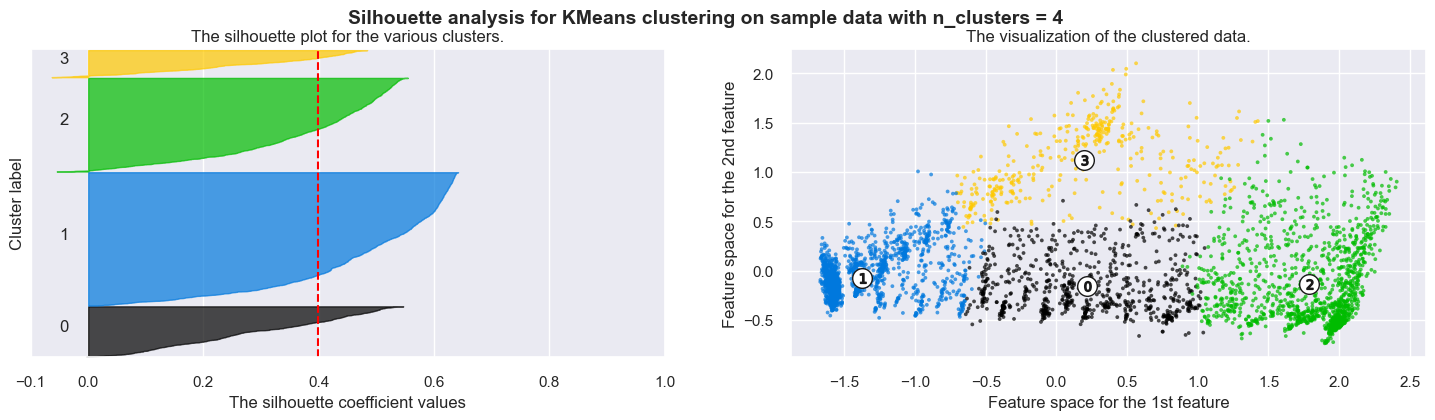

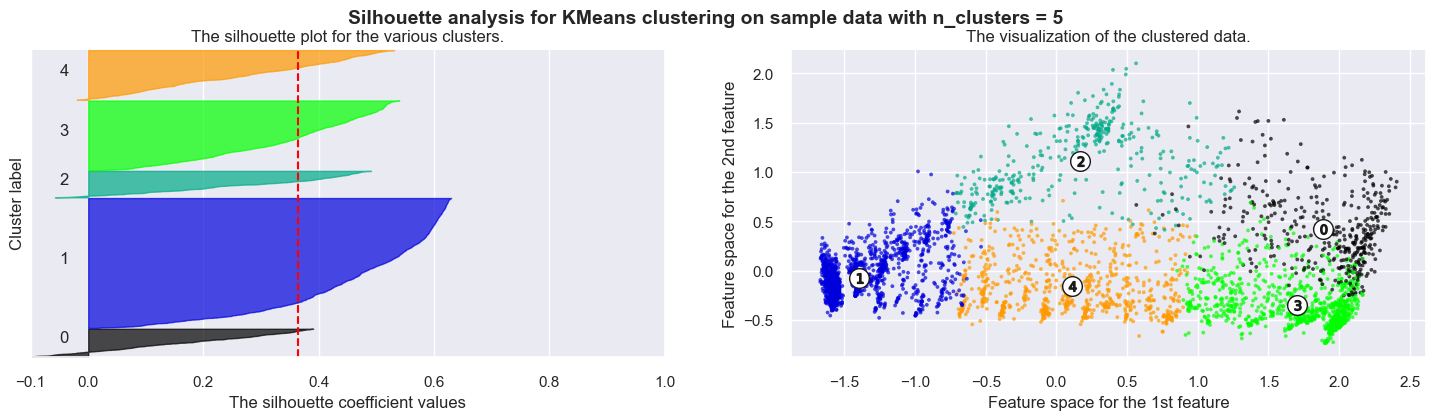

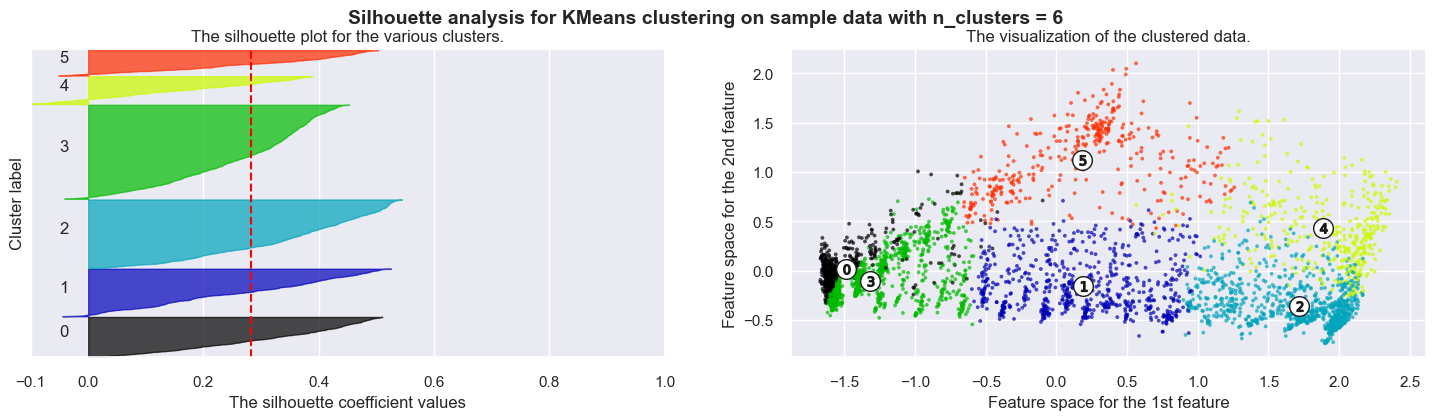

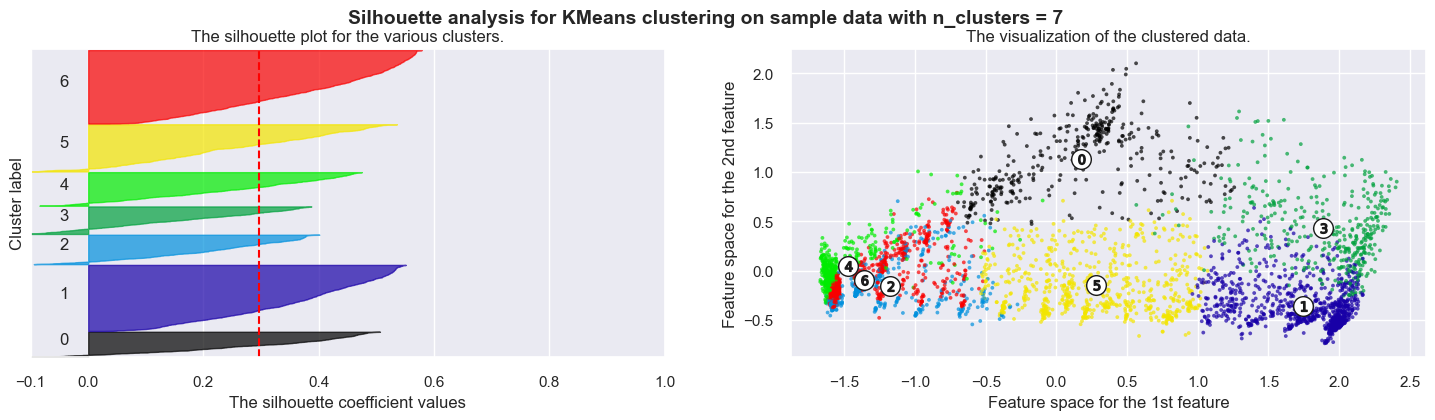

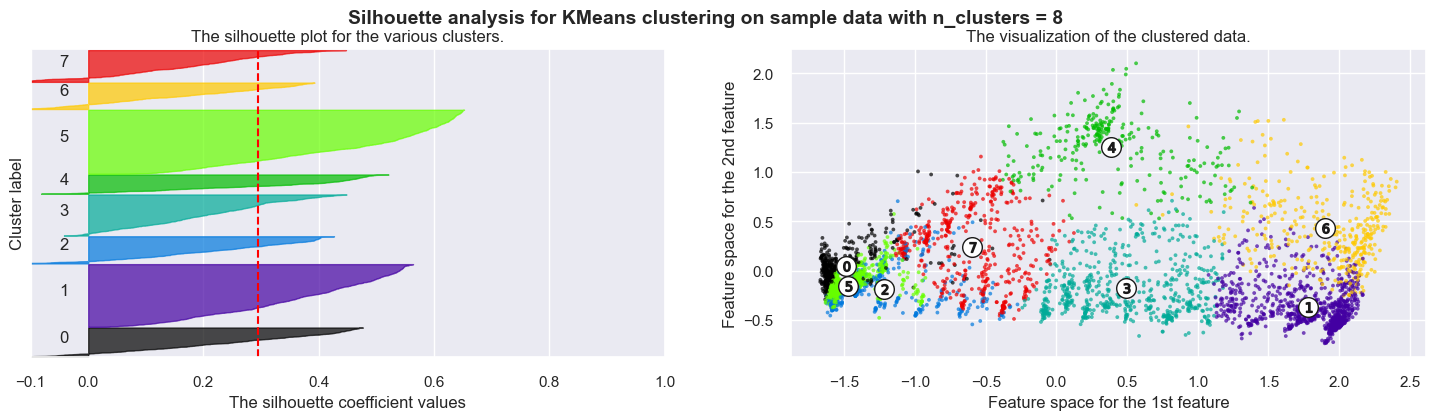

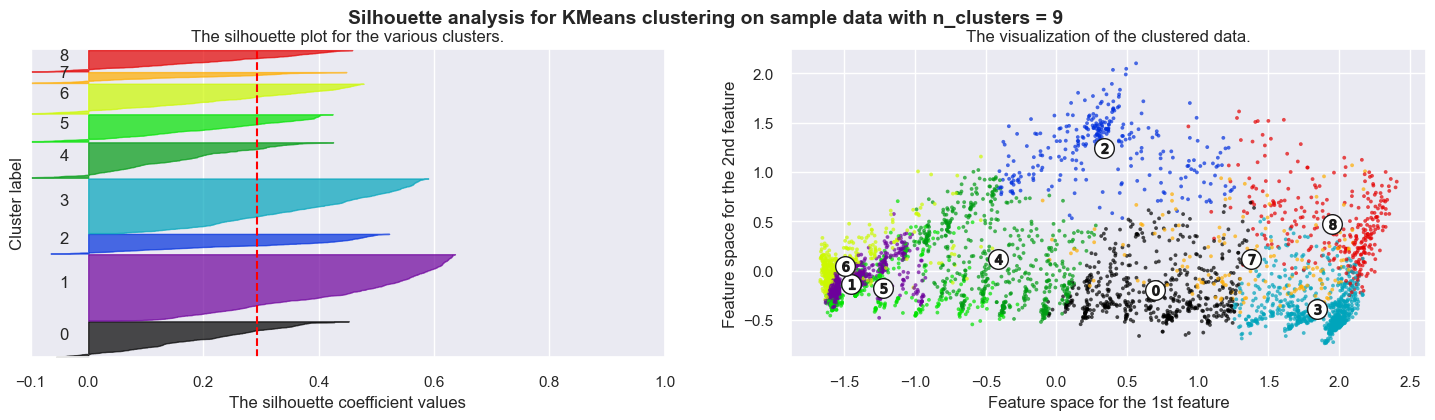

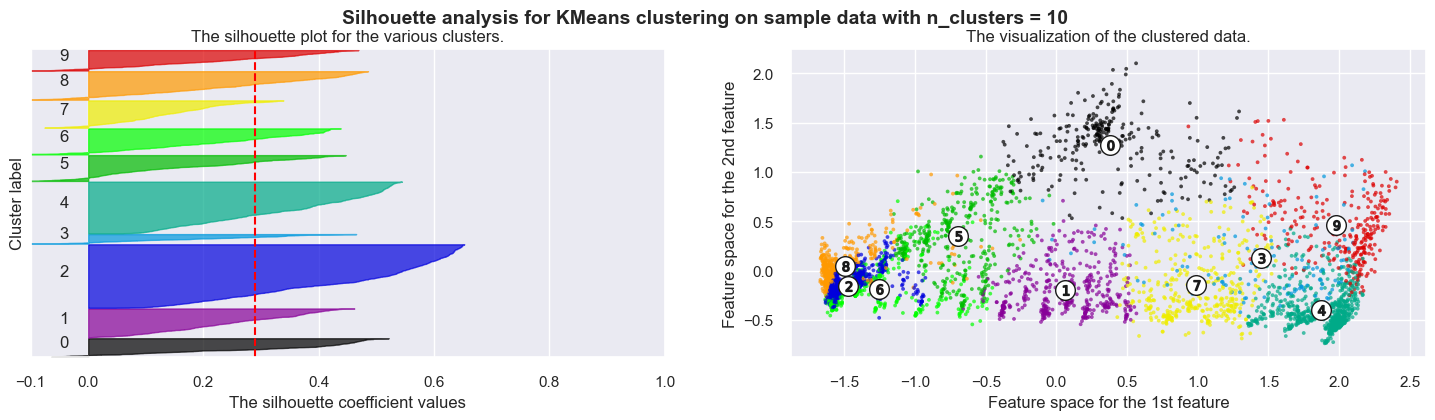

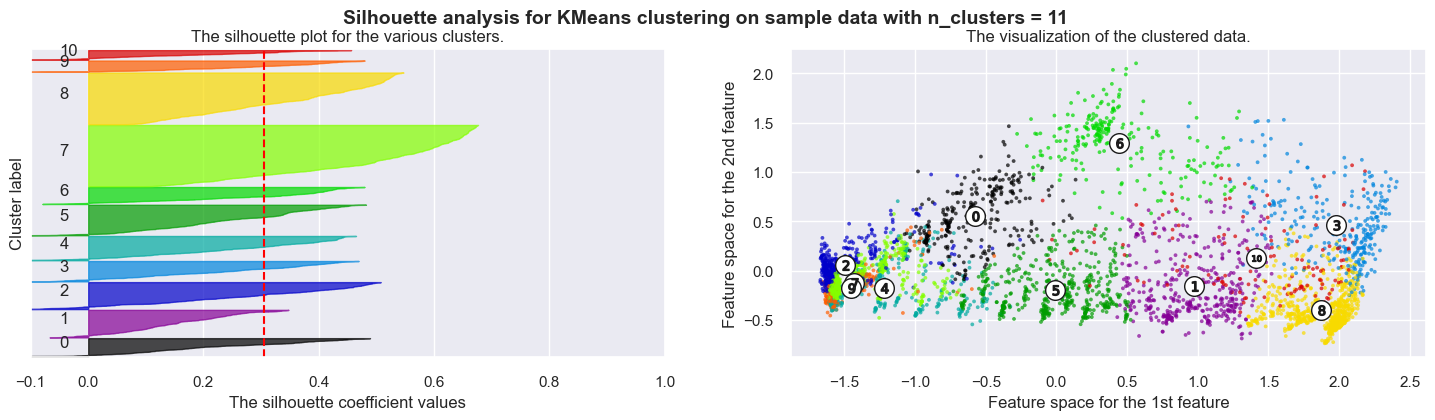

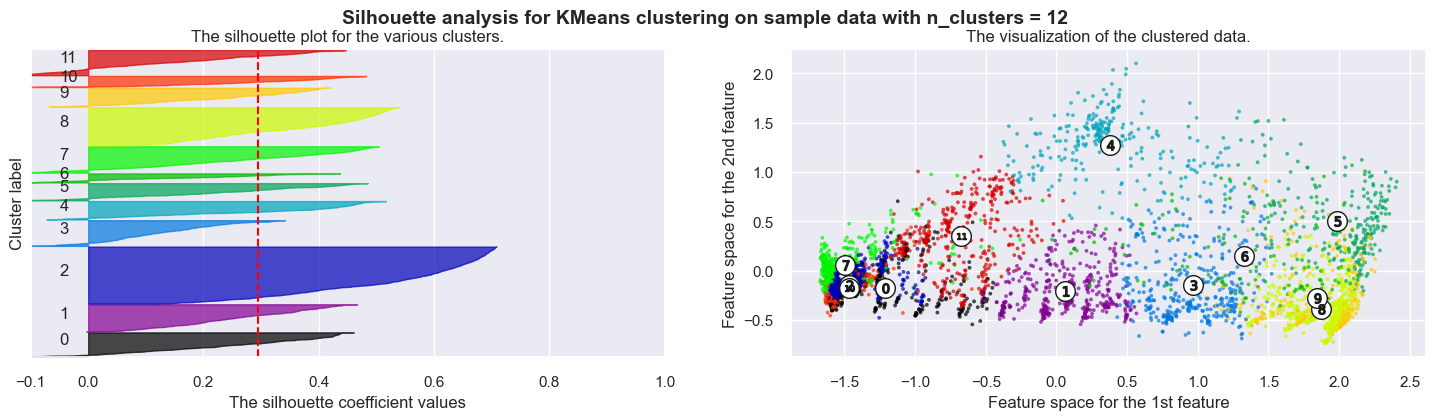

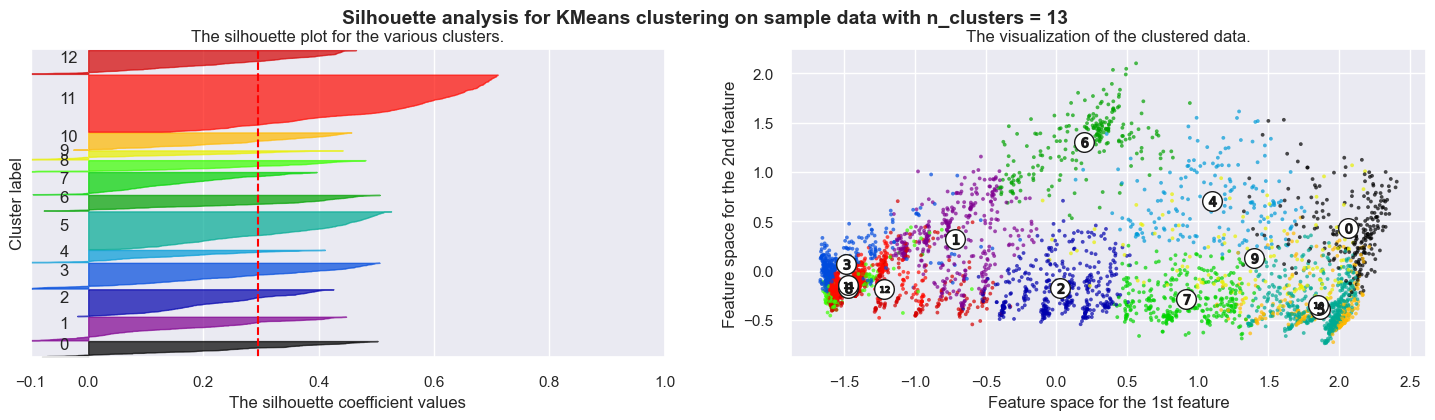

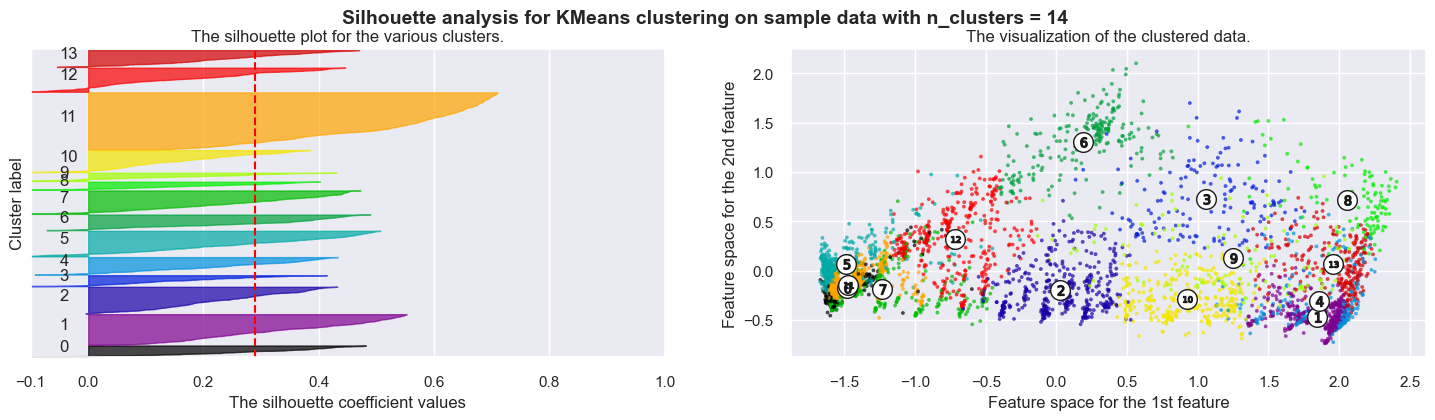

In [219]:
# Display the Silhouette Score and Plot Silhouette Plot

plot_silhouette(range(2, max_cluster), df_final_pca, random_state)

Berdasarkan visualisasi cluster diatas terlihat bahwa n_cluster = 4 memberikan visualisasi yang baik, semua data sudah sesuai dengan clusternya. Oleh karena itu dapat disimpulkan bahwa berdasarkan Silhouette Method, jumlah cluster yang optimal dan dapat digunakan adlaah n_cluster = 4.

# 7- Model Definition

## 7.1- K-Mean Clustering

### 7.1.1- Elbow Method

In [224]:
# import model
km_el = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
km_el

KMeans(n_clusters=3, n_init=10, random_state=10)

Inisiasi pada model ini yaitu K-Means, dimana cluster awal berjumlah 3. Ini hanya inisiasi saja untuk nilai K /cluster yang akan terbentuk lebih optimal.

### 7.1.2- Silhouette Method

In [223]:
sil_me = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
sil_me

KMeans(n_clusters=4, n_init=10, random_state=10)

# 8- Model Training

## 8.1- KMeans

### 8.1.1- Elbow Method

In [225]:
# Cek number of cluster
pred_el = km_el.fit_predict(df_final_pca)
pred_el

array([1, 1, 1, ..., 1, 1, 1])

nilai yang dihasilkan dari Elbow Method

### 8.1.2- Silhouette Method

In [226]:
# Cek number of cluster
pred_sil = sil_me.fit_predict(df_final_pca)
pred_sil

array([1, 1, 1, ..., 1, 1, 1])

Nilai yang dihasilkan dari Silhouette Method

# 9- Model Evaluation

## 9.1- Elbow Method

In [227]:
# Memasukan hasil clustering ke dataset asli

df['cluster_elbow'] = pred_el
df

cust_id      balance  balance_frequency  purchases  oneoff_purchases  \
2        6075   757.964752              0.875      157.4             157.4   
3        6291   264.566591              0.375     1150.0            1150.0   
4        7755   440.613643              1.000      600.0             600.0   
5        8299   611.561026              1.000      765.0             765.0   
7        8805   105.333584              0.375      306.0             306.0   
...       ...          ...                ...        ...               ...   
4470     2345  9629.808851              1.000        0.0               0.0   
4471     6785  1040.030221              1.000        0.0               0.0   
4472     7347  1322.818587              1.000        0.0               0.0   
4473     8447  1060.391273              1.000        0.0               0.0   
4474     1995  3447.674222              1.000      205.0             205.0   

      installments_purchases  cash_advance  purchases_frequency  \
2                        0.0      0.000000             0.125000   
3                        0.0      0.000000             0.125000   
4                        0.0      0.000000             0.125000   
5                        0.0      0.000000             0.125000   
7                        0.0      0.000000             0.125000   
...                      ...           ...                  ...   
4470                     0.0   4372.393835             0.000000   
4471                     0.0   1390.648290             0.000000   
4472                     0.0    762.301096             0.000000   
4473                     0.0   1475.858013             0.000000   
4474                     0.0   4548.057776             0.090909   

      oneoff_purchases_frequency  purchases_installments_frequency  \
2                       0.125000                               0.0   
3                       0.125000                               0.0   
4                       0.125000                               0.0   
5                       0.125000                               0.0   
7                       0.125000                               0.0   
...                          ...                               ...   
4470                    0.000000                               0.0   
4471                    0.000000                               0.0   
4472                    0.000000                               0.0   
4473                    0.000000                               0.0   
4474                    0.090909                               0.0   

      cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
2                   0.000000                 0              6        1200.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              1        1000.0   
5                   0.000000                 0              1        2000.0   
7                   0.000000                 0              2        6000.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         payments  minimum_payments  prc_full_payment  tenure  cluster_elbow  
2     1494.480376       2638.598410               0.0       8              1  
3     3029.380326         85.428885               0.0       8              1  
4      215.316424        137.846006               0.0       8              1  
5      204.464151        146.352314               0.0       8              1  
7      101.986927        118.324082               0.0       8              1  


Dari data diatas telah ditambahkan dolom cluster_elbow untuk menunjukan data mana saja yang termasuk cluster 0, cluster 1, dan cluster 2.

In [230]:
# rata-rata nilai fitur setiap cluster
df.groupby('cluster_elbow').mean().T

cluster_elbow                               0            1            2
cust_id                           4502.533981  4451.723840  4483.025391
balance                           1499.886890  1834.093339  1326.990232
balance_frequency                    0.958389     0.849450     0.887508
purchases                         1961.076921   199.579768  1203.779590
oneoff_purchases                   931.065333   178.176397   935.613633
installments_purchases            1030.448481    21.444752   268.475527
cash_advance                       635.602852  1512.385036   591.201299
purchases_frequency                  0.941845     0.078905     0.624698
oneoff_purchases_frequency           0.270592     0.058916     0.382903
purchases_installments_frequency     0.879263     0.019141     0.278973
cash_advance_frequency               0.083802     0.211076     0.086112
cash_advance_trx                     2.101248     4.981661     2.260742
purchases_trx                       33.267684     1.469256    14.888672
credit_limit                      4824.205999  4147.801804  4764.455344
payments                          2221.090587  1546.977187  1594.067165
minimum_payments                  1041.856511   869.642972   645.414482
prc_full_payment                     0.250754     0.055006     0.203792
tenure                              11.556172    11.458468    11.653320

In [228]:
# jumlah orang pada setiap cluster
df['cluster_elbow'].value_counts().to_frame().sort_index()

count
cluster_elbow       
0               1442
1               1854
2               1024

Pada data diatas dari cluster 0 merupakan total jumlah nasabah kelompok menengah dibandingkan dengan cluster 1 dan cluster 2 yaitu sebanyak 1442 nasabah.

<Axes: >

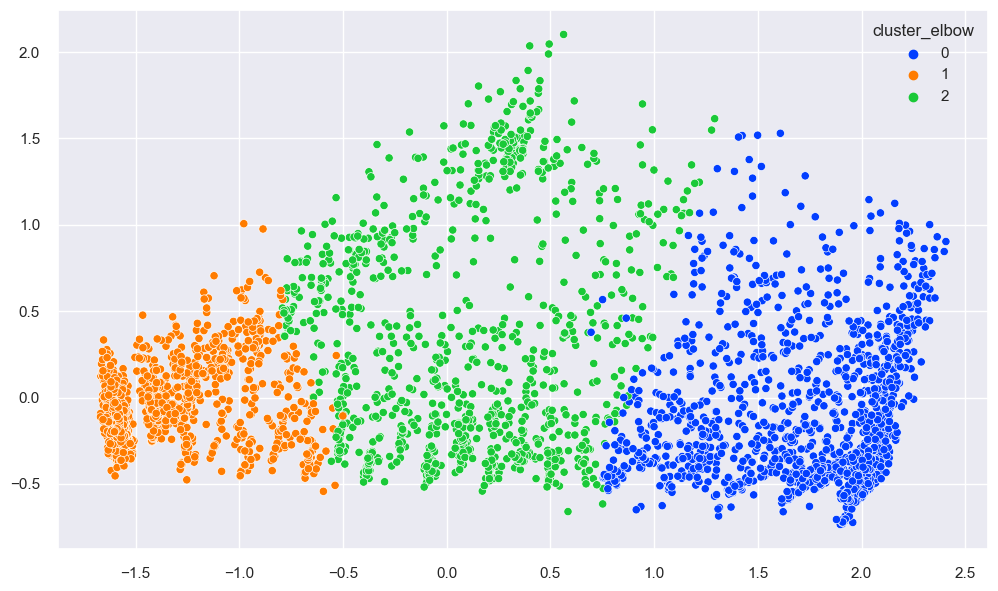

In [229]:
# Visusalisasi dengan 2D pada kolom cluster elbow 

pca_2d = PCA(n_components=5)
pca_2d.fit(df_final_pca)

df_final_pca_2d = pca_2d.fit_transform(df_final_pca)

sns.scatterplot(x=df_final_pca_2d[:,0], y=df_final_pca_2d[:,1], hue=df['cluster_elbow'], palette='bright')

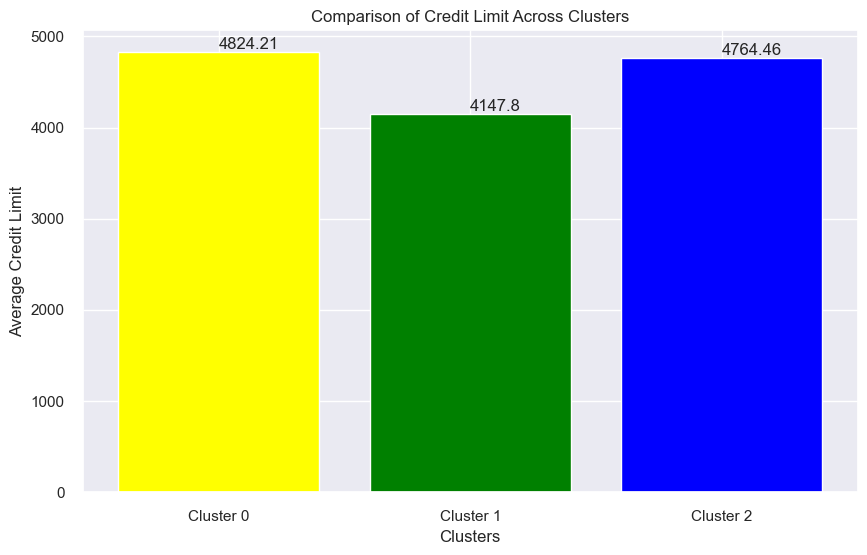

In [236]:
# Data
clusters_el = ['Cluster 0', 'Cluster 1', 'Cluster 2']
credit_limit_df = [4824.205999, 4147.801804, 4764.455344]

plt.figure(figsize=(10, 6))
bars = plt.bar(clusters_el, credit_limit_df, color=['yellow', 'green', 'blue'])
# Menambahkan nilai di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')
plt.title('Comparison of Credit Limit Across Clusters')
plt.xlabel('Clusters')
plt.ylabel('Average Credit Limit')
plt.show()


Berdasarkan visualisasi diatas diperoleh 3 cluster hasil dari KMeans dengan ciri-ciri setiap cluster sebagai berikut :

- Nasabah pada cluster ini lebih konsumtif dalam menggunakan kartu kredit mereka. Hal ini ditunjukan dari jumlah penggunaan credit limit pada credit card. Penggunanaan nasabah yang menggunakan credit card dengan limit terbanyak pada cluster 0 dengan nilai sebesar 4824.21, dapat diartikan bahwa penggunaan credit card lebih banyak dak dari pada cluster 1 dan cluster 2.


## 9.2- Silhouette Method

In [244]:
# Memasukan hasil clustering ke dataset asli

df['cluster_silhouette'] = pred_sil
df

cust_id      balance  balance_frequency  purchases  oneoff_purchases  \
2        6075   757.964752              0.875      157.4             157.4   
3        6291   264.566591              0.375     1150.0            1150.0   
4        7755   440.613643              1.000      600.0             600.0   
5        8299   611.561026              1.000      765.0             765.0   
7        8805   105.333584              0.375      306.0             306.0   
...       ...          ...                ...        ...               ...   
4470     2345  9629.808851              1.000        0.0               0.0   
4471     6785  1040.030221              1.000        0.0               0.0   
4472     7347  1322.818587              1.000        0.0               0.0   
4473     8447  1060.391273              1.000        0.0               0.0   
4474     1995  3447.674222              1.000      205.0             205.0   

      installments_purchases  cash_advance  purchases_frequency  \
2                        0.0      0.000000             0.125000   
3                        0.0      0.000000             0.125000   
4                        0.0      0.000000             0.125000   
5                        0.0      0.000000             0.125000   
7                        0.0      0.000000             0.125000   
...                      ...           ...                  ...   
4470                     0.0   4372.393835             0.000000   
4471                     0.0   1390.648290             0.000000   
4472                     0.0    762.301096             0.000000   
4473                     0.0   1475.858013             0.000000   
4474                     0.0   4548.057776             0.090909   

      oneoff_purchases_frequency  purchases_installments_frequency  ...  \
2                       0.125000                               0.0  ...   
3                       0.125000                               0.0  ...   
4                       0.125000                               0.0  ...   
5                       0.125000                               0.0  ...   
7                       0.125000                               0.0  ...   
...                          ...                               ...  ...   
4470                    0.000000                               0.0  ...   
4471                    0.000000                               0.0  ...   
4472                    0.000000                               0.0  ...   
4473                    0.000000                               0.0  ...   
4474                    0.090909                               0.0  ...   

      cash_advance_trx  purchases_trx  credit_limit     payments  \
2                    0              6        1200.0  1494.480376   
3                    0              1        1200.0  3029.380326   
4                    0              1        1000.0   215.316424   
5                    0              1        2000.0   204.464151   
7                    0              2        6000.0   101.986927   
...                ...            ...           ...          ...   
4470                 9              0       12000.0  2468.988022   
4471                18              0        1400.0   290.129620   
4472                11              0        1500.0  1035.627320   
4473                10              0        2000.0   407.360560   
4474                 7              1       10500.0   665.239171   

      minimum_payments  prc_full_payment  tenure  cluster_elbow  \
2          2638.598410               0.0       8              1   
3            85.428885               0.0       8              1   
4           137.846006               0.0       8              1   
5           146.352314               0.0       8              1   
7           118.324082               0.0       8              1   
...                ...               ...     ...            ...   
4470       2134.295731               0.0      11              1   
4471      

In [240]:
# rata-rata nilai fitur setiap cluster
df.groupby('cluster_silhouette').mean().T

cluster_silhoutte                           0            1            2  \
cust_id                           4385.672269  4468.155837  4554.564759   
balance                           1098.457102  1834.178281  1544.956401   
balance_frequency                    0.840369     0.852974     0.962928   
purchases                          716.952451   215.638008  2031.325730   
oneoff_purchases                   308.431933   194.479329   958.169104   
installments_purchases             408.964496    21.199208  1073.631024   
cash_advance                       568.809802  1496.613423   637.282984   
purchases_frequency                  0.550856     0.086456     0.959274   
oneoff_purchases_frequency           0.124868     0.067413     0.279482   
purchases_installments_frequency     0.443660     0.018401     0.899589   
cash_advance_frequency               0.081090     0.208647     0.085380   
cash_advance_trx                     2.169468     4.922345     2.163404   
purchases_trx                       10.691877     1.625462    34.582078   
credit_limit                      4040.129941  4164.936368  4892.264513   
payments                          1213.637886  1549.098837  2257.627932   
minimum_payments                   634.642017   865.815532  1057.715502   
prc_full_payment                     0.190591     0.053358     0.251416   
tenure                              11.596639    11.466455    11.546687   
cluster_elbow                        1.700280     1.025885     0.000000   

cluster_silhoutte                           3  
cust_id                           4412.251948  
balance                           1594.763601  
balance_frequency                    0.966788  
purchases                         2111.316208  
oneoff_purchases                  2000.481221  
installments_purchases             110.834987  
cash_advance                       624.311918  
purchases_frequency                  0.813594  
oneoff_purchases_frequency           0.788563  
purchases_installments_frequency     0.111149  
cash_advance_frequency               0.088587  
cash_advance_trx                     2.184416  
purchases_trx                       24.171429  
credit_limit                      5868.902007  
payments                          2353.562766  
minimum_payments                   724.182337  
prc_full_payment                     0.263067  
tenure                              11.742857  
cluster_elbow                        1.937662

In [245]:
# jumlah orang pada setiap cluster
df['cluster_silhouette'].value_counts().to_frame().sort_index()

count
cluster_silhouette       
0                     714
1                    1893
2                    1328
3                     385

Berdasarkan data diatas diperoleh 4 cluster dari model KMeans Silhouette Method. Dari cluster 0 = 714 nasabah, dari cluster 1 = 1893, dari cluster 2 = 1328, dan dari cluster 3 = 385.

<Axes: >

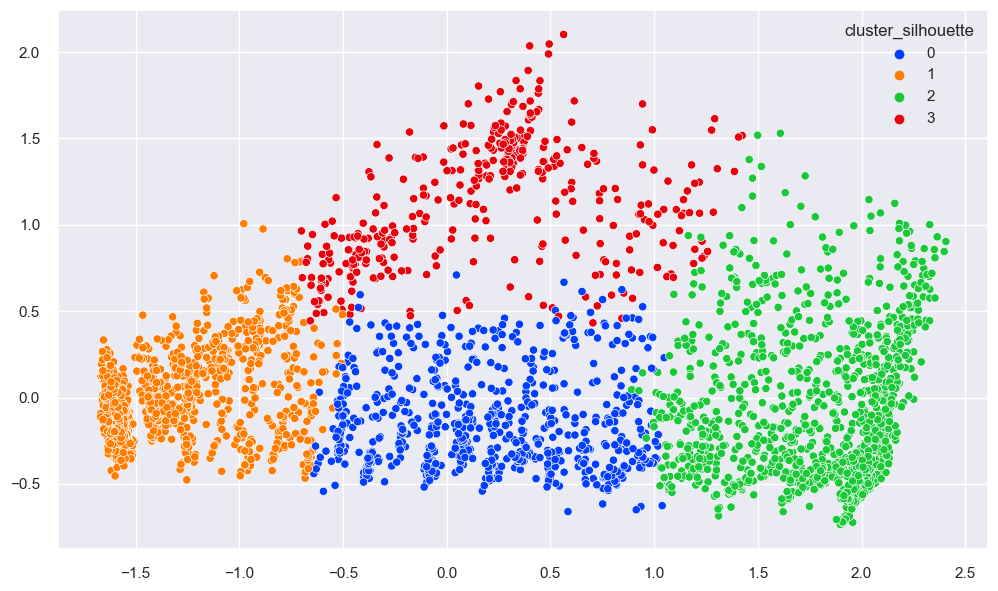

In [246]:

sns.scatterplot(x=df_final_pca_2d[:,0], y=df_final_pca_2d[:,1], hue=df['cluster_silhouette'], palette='bright')

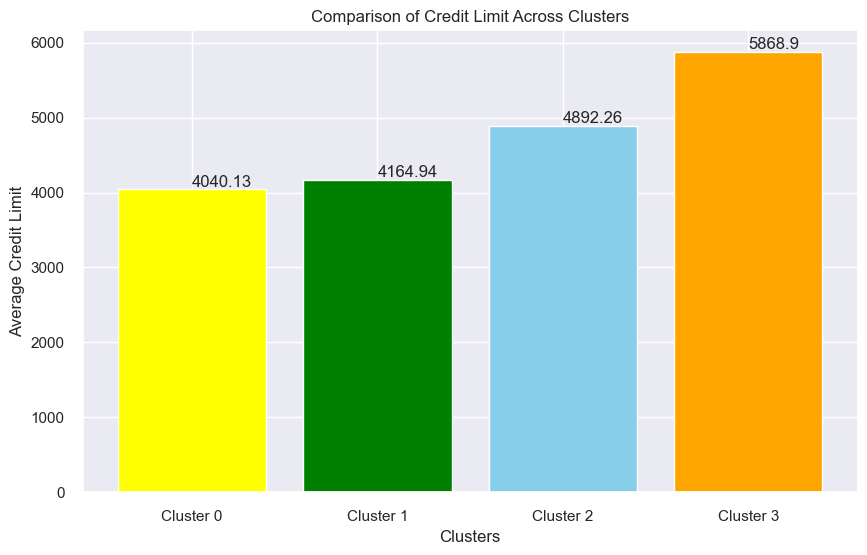

In [247]:
# Data
clusters_el = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
credit_limit_df = [4040.129941, 4164.936368, 4892.264513, 5868.902007]

plt.figure(figsize=(10, 6))
bars = plt.bar(clusters_el, credit_limit_df, color=['yellow', 'green', 'skyblue', 'orange'])
# Menambahkan nilai di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')
plt.title('Comparison of Credit Limit Across Clusters')
plt.xlabel('Clusters')
plt.ylabel('Average Credit Limit')
plt.show()


Berdasarkan data diatas diperoleh 4 cluster dari model KMeans Silhouette Method. Dari cluster 0 = 714 nasabah, dari cluster 1 = 1893, dari cluster 2 = 1328, dan dari cluster 3 = 385.

Pda visualisasi diatas dijelaskan sebagai berikut :

- Cluster 0 dengan jumlah 714 nasabah memiliki rata pengeluaran pada credit card dengan limit 4040.13.
- Cluster 1 dengan jumlah 1893 dengan jumlah nasabah paling banyak daripada cluster lain, hanya mengeluarkan rata-rata credit card dengan limit 4164.94.
- Cluster 2 dengan jumlah 1382 nasabah memiliki rata-rata pengeluaran credit card dengan limit 4892.26.
- Cluster 3 dengan jumlah 385 nasabah merupakan dengan jumlah nasabah paling sedikit dari pada cluster lainnya. Tapi memiliki pengeluaran rata-rata credit card dengan limit 5868.9, ini merupakan jumlah terbesar daripada cluster lainnya.

# 10- Model Analysis

Dari analisa yang didapat dari teknik yang berbeda antara Elbow Method dengan Silhouette Method, memeliki kemiripan untuk menentukan clustering pada dataset. 

- Dari visualisasi Elbow Method menunjukan patahan pada 3.0. Karena metode ini memplot variasi yang dijelaskan sebagai fungsi darijumlah cluster dan memilih siku kurva sebagai jumlah cluster yang digunakan. Jumlah cluster yang optimal dapat membantu dalam memberikan pemahaman yang lebih baik tentang variasi dalam perilaku pengguna kartu kredit. Namun dari sifat yang relatif dan tergantung pada interpretasi subjektif dari siku pada grafik.

- Untuk Silhouette Method mengacu pada interpretasi dan validasi konsistensi dalam bentuk kelompok data. Teknik ini memberikan representasi grafis ringkas seberapa baik setiap objek yang telah diklasifikasikan. Dari visualisasi yang ditampilkan memudahkan untuk dipahami karena pembagian cluster yang di pilih yaitu 4, itu merupakan kelebihan dari silhouette method yang dapat mengidentifikasi lebih banyak segmen nasabah dengan karakteristik yang berbeda. Namun cluster yang terlalu banyak bisa mempersulit strategi pemasaran dan layanan nasabah jika tidak dikelola dengan baik.

# 10- Model Inference

In [248]:
df.columns

Index(['cust_id', 'balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure', 'cluster_elbow',
       'cluster_silhoutte', 'cluster_silhouette'],
      dtype='object')

In [250]:
df_cols = ['balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'oneoff_purchases_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'prc_full_payment', 'tenure',]
df_coln = ['purchases_frequency', 'purchases_installments_frequency' ]

In [256]:
# Import library

with open('data_kmeans.pkl', 'wb') as file_1:
  pickle.dump(km_el,file_1)

with open('model_scaler_skew.pkl', 'wb') as file_2:
  pickle.dump(scaler_skew,file_2)

with open('model_scaler_normal.pkl', 'wb') as file_3:
  pickle.dump(scaler_nor,file_3)

with open('list_num_column_skew.txt', 'w') as file_4:
  json.dump(df_cols, file_4)

with open('list_num_column_normal.txt', 'w') as file_5:
  json.dump(df_coln, file_5)

# 11- Kesimpulan

Pada objective kali ini melakukan teknik Clustering terhadap dataset Credit Card dan menggunakan model clustering yang digunakan adalah K-Means

- Berdasarkan EDA yang telah dilakukan sebelumnya, didapati bahwa kolom yang memiliki korelasi tinggi pada setiap kolom cukup sedikit, beberapa kolom yang memiliki korelasi yang tinggi seperti kolom `purchases_installments_frequency` pada `cashe_advance` dan kolom lainnya.
- Terdapat banyak nilai null pada kolom `minimum_payments`, dimana hanya kolom tersebut memiliki korelasi hanya pada kolom `balance` yang cukup tinggi, sedangkan untuk korelasi dengan kolom yang lain sangatlah rendah. Kemungkinan penyebab dari rendahnya korelasi pada kolom `minimum_payments` ini karena memiliki nilai null sangat banyak.
- Pada proses Model Definisi, pada model K-Means menggunakan 2 teknik yang berbeda dalam menentukan nilai K atau nilai dari clusteringnya. Pada teknik pertama yaitu Elbow Method pada diagram yang terbentuk terdapat patahan pada angka 3.0, yang artinya cluster yang terbaik adalah 3 clustering. Sedangakan untuk metode yang kedua yaitu Silhouette Method apabila dilihat dari Coefficient value yang dimana persebaran antar cluster dapat tersebar dengan baik, maka cluster 3 lah yang memiliki Coefficient values terbaik.

In [258]:
# Mengambil data random dari hasil final
df[:1].to_dict()

{'cust_id': {2: 6075},
 'balance': {2: 757.964752},
 'balance_frequency': {2: 0.875},
 'purchases': {2: 157.4},
 'oneoff_purchases': {2: 157.4},
 'installments_purchases': {2: 0.0},
 'cash_advance': {2: 0.0},
 'purchases_frequency': {2: 0.125},
 'oneoff_purchases_frequency': {2: 0.125},
 'purchases_installments_frequency': {2: 0.0},
 'cash_advance_frequency': {2: 0.0},
 'cash_advance_trx': {2: 0},
 'purchases_trx': {2: 6},
 'credit_limit': {2: 1200.0},
 'payments': {2: 1494.480376},
 'minimum_payments': {2: 2638.59841},
 'prc_full_payment': {2: 0.0},
 'tenure': {2: 8},
 'cluster_elbow': {2: 1},
 'cluster_silhoutte': {2: 1},
 'cluster_silhouette': {2: 1}}

# 12- Conceptual Problem

**1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?**
- Algoritma K-Means mencoba untuk mengoptimalkan fungsi tujuan yang disebut sebagai fungsi inersia (inertia function) atau sum squared error (SSE). Fungsi tersebut mengukur sejauh mana data dalam klaster berada dekat dengan pusat klasternya.

**2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !**
- Alasan penggunaan dari elbow method ialah untuk mencari nilai K terbaik pada dataset yang telah direduce dimensionalnya. Kelemah dari elbow method sendiri hanya mempertimbangkan optimal K dari reduce dimensinya sehingga penggunaan dari elbow sendiri harus mencari nilai K terbaiknya.